# Projet Machine Learning: Prédiction de l'émission de CO2

L'objectif de ce projet est de se servir des informations collectées 

Nous allons commencer par importer les librairies dont nous aurons besoin et à charger les données. 

In [1]:
import pandas as pd
import numpy as np
import random as rd



import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('darkgrid')


%matplotlib inline





In [2]:
# Spécifiez le chemin du fichier Excel
energy ="global-data-on-sustainable-energy (1).csv"
energy=pd.read_csv(energy, sep=",")
energy

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


Le jeu de données est composé de 3649 observations et 21 variables. Les observations, représentant les individus, sont les données liées à la consommation d'énergie colléctées dans 176 pays et sur 21 années. Théoriquement, on devrait avoir 3696 observations. Il y a donc des données manquantes. Nous allons faire une analyse exploratoire afin de les identifier.

## Analyse exploratoire des données : 

La première étape de l'analyse descriptive est de vérifier l'encodage de nos données. 

In [3]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

Nous voyons que sur les 21 variables, 2 sont considérées comme qualitatives : Entity et Density. 
Les autres sont considérées comme quantitatives. Cependant l'encodage de Density et Year ne sont pas optimales au vu des observations. En effet, Year devrait être considérée comme qualitative puisque nous n'avons que 21 modalités. De même, Density représentant un scalaire, il serait pertinent de l'encoder comme une variable quantitative.

In [4]:
energy["Entity"]=pd.Categorical(energy["Entity"],ordered=False)
energy["Year"]=pd.Categorical(energy["Year"],ordered=True)
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   Entity                                                            3649 non-null   category
 1   Year                                                              3649 non-null   category
 2   Access to electricity (% of population)                           3639 non-null   float64 
 3   Access to clean fuels for cooking                                 3480 non-null   float64 
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64 
 5   Financial flows to developing countries (US $)                    1560 non-null   float64 
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64 
 7   Electricity from fossil 

In [5]:
import re 
def clean_density(density):
    if pd.isnull(density):
        return np.nan
    if isinstance(density, (int,float)): 
        return density
    
    cleaned_density=re.sub(r'[^0-9.]', '', str(density))
    return float(cleaned_density)
energy['Density\\n(P/Km2)']=energy['Density\\n(P/Km2)'].apply(clean_density)



In [6]:
energy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   Entity                                                            3649 non-null   category
 1   Year                                                              3649 non-null   category
 2   Access to electricity (% of population)                           3639 non-null   float64 
 3   Access to clean fuels for cooking                                 3480 non-null   float64 
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64 
 5   Financial flows to developing countries (US $)                    1560 non-null   float64 
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64 
 7   Electricity from fossil 

In [7]:
energy.head(270)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Bahrain,2013,100.000000,100.0,0.90,NaN,0.00,24.36,0.0,0.00,...,161365.53000,9.54,28850.000380,NaN,5.416840,24744.296960,2239.0,765.0,26.06670,50.557700
266,Bahrain,2014,100.000000,100.0,4.26,NaN,0.00,25.62,0.0,0.01,...,153929.60000,8.77,30280.000690,NaN,4.350391,24989.437530,2239.0,765.0,26.06670,50.557700
267,Bahrain,2015,100.000000,100.0,4.15,NaN,0.00,26.77,0.0,0.01,...,149472.80000,9.05,30579.999920,NaN,2.485379,22634.085650,2239.0,765.0,26.06670,50.557700
268,Bahrain,2016,100.000000,100.0,4.69,NaN,0.00,26.80,0.0,0.01,...,144113.94000,8.62,30299.999240,NaN,3.558128,22608.452560,2239.0,765.0,26.06670,50.557700


On a bien le bon format pour toutes nos variables. Passons maintenant à l'identification des valeurs manquantes

In [8]:

energy_missing_value = energy.isnull().sum().sort_values(ascending=False)
print(energy_missing_value)

missing=energy.isnull().sum().values
T= np.sum(missing)
Percent= np.floor(1/energy.shape[0]*missing*100)
#print(M)
print("Taux de valeurs manquantes par variable  en % : ")
print(Percent)
print("Taux global de valeurs manquantes  en % : ")
print(100*T/(energy.shape[0]*energy.shape[1]))





Renewables (% equivalent primary energy)                            2137
Financial flows to developing countries (US $)                      2089
Renewable-electricity-generating-capacity-per-capita                 931
Value_co2_emissions_kt_by_country                                    428
gdp_growth                                                           317
gdp_per_capita                                                       282
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Renewable energy share in the total final energy consumption (%)     194
Access to clean fuels for cooking                                    169
Electricity from nuclear (TWh)                                       126
Low-carbon electricity (% electricity)                                42
Electricity from renewables (TWh)                                     21
Electricity from fossil fuels (TWh)                                   21
Access to electricity (% of population)            

On remarque qu'il y a des données manquantes pour 11 variables. On fait le choix de ne garder que les variables qui ont un taux de données manquantes inférieur à 15%. Nous allons donc supprimer de notre étude les variables : Renewable-electricity-generating-capacity-per-capita, Financial flows to developing
countries (US Dollars) et Renewables (% equivalent primary energy).

In [9]:
#to_drop=['Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)']
energy=energy.drop(energy.columns[4],axis=1)
#energy=energy
energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [10]:
energy=energy.drop(energy.columns[4],axis=1)
energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [11]:
energy=energy.drop(energy.columns[12],axis=1)
energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [12]:
M=energy.isnull().sum().values
T= np.sum(M)
Percent= np.floor(1/energy.shape[0]*M*100)
#print(M)
print("Taux de valeurs manquantes par variable en % : ")
print(Percent)
print("Taux de valeurs manquantes par variable en % : ")
print(100*T/(energy.shape[0]*energy.shape[1]))

Taux de valeurs manquantes par variable en % : 
[ 0.  0.  0.  4.  5.  0.  3.  0.  1.  0.  5. 11.  8.  7.  0.  0.  0.  0.]
Taux de valeurs manquantes par variable en % : 
2.7724490728053346


En enlevant ces colonnes, nous avons drastiquement diminué le taux de valeurs manquantes dans nos données. Ce qui rend notre jeu de données plus exploitable et donc nos prévisions plus pertinentes.

In [13]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   Entity                                                            3649 non-null   category
 1   Year                                                              3649 non-null   category
 2   Access to electricity (% of population)                           3639 non-null   float64 
 3   Access to clean fuels for cooking                                 3480 non-null   float64 
 4   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64 
 5   Electricity from fossil fuels (TWh)                               3628 non-null   float64 
 6   Electricity from nuclear (TWh)                                    3523 non-null   float64 
 7   Electricity from renewab

Question 3: 

Dans le but d'avoir un jeu de données exploitable, nous allons enlever les individus qui ont des valeurs manquantes.


In [14]:
energy= energy.dropna()
energy.info()
energy.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2868 entries, 3 to 3647
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   Entity                                                            2868 non-null   category
 1   Year                                                              2868 non-null   category
 2   Access to electricity (% of population)                           2868 non-null   float64 
 3   Access to clean fuels for cooking                                 2868 non-null   float64 
 4   Renewable energy share in the total final energy consumption (%)  2868 non-null   float64 
 5   Electricity from fossil fuels (TWh)                               2868 non-null   float64 
 6   Electricity from nuclear (TWh)                                    2868 non-null   float64 
 7   Electricity from renewab

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3,Afghanistan,2003,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.93911,67.709953


In [15]:
M=energy.isnull().sum().values
T= np.sum(M)
Percent= np.floor(1/energy.shape[0]*M*100)
#print(M)
print("Taux de valeurs manquantes par variable en % : ")
print(Percent)
print("Taux de valeurs manquantes par variable en % : ")
print(100*T/(energy.shape[0]*energy.shape[1]))

Taux de valeurs manquantes par variable en % : 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Taux de valeurs manquantes par variable en % : 
0.0


Notre jeu de données est donc prêt à l'emploi.

## Analyse descriptive unidimensionnelle

## Pour les variables qualitatives 

In [16]:
pd.crosstab(energy.Year, "freq")


col_0,freq
Year,
2000,137
2001,138
2002,140
2003,141
2004,141
2005,141
2006,141
2007,144
2008,144


<Axes: xlabel='Year'>

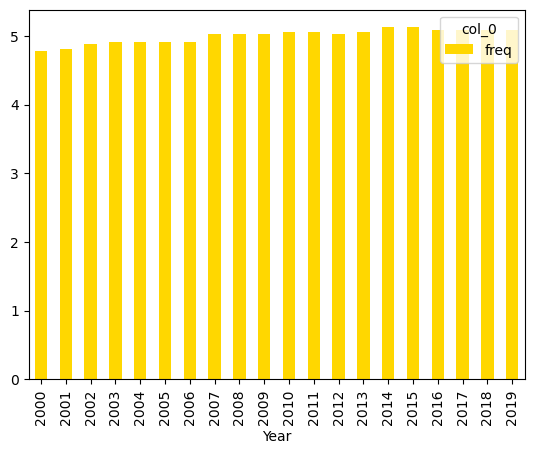

In [17]:
t=pd.crosstab(energy.Year,"freq", normalize=True)
(t * 100).plot(kind = "bar",color='gold')
#t.plot.pie(subplots=True, figsize = (6, 6))

On constate qu'aucune donnée n'a été prise en 2020 comme annoncé dans le sujet. De plus, les occurrences des années ne sont pas les mêmes. Il y a donc eu des années où les données n'ont pas été relevées dans le même nombre de pays.

Théoriquement, le nombre d'occurrences de chaque pays devrait être 20 vu que les données ont été collectées entre 2000 et 2019. Nous allons donc afficher l'histogramme de la variable Entity mais en ne conservant que les modalités dont les occurrences sont inférieures à 20. 

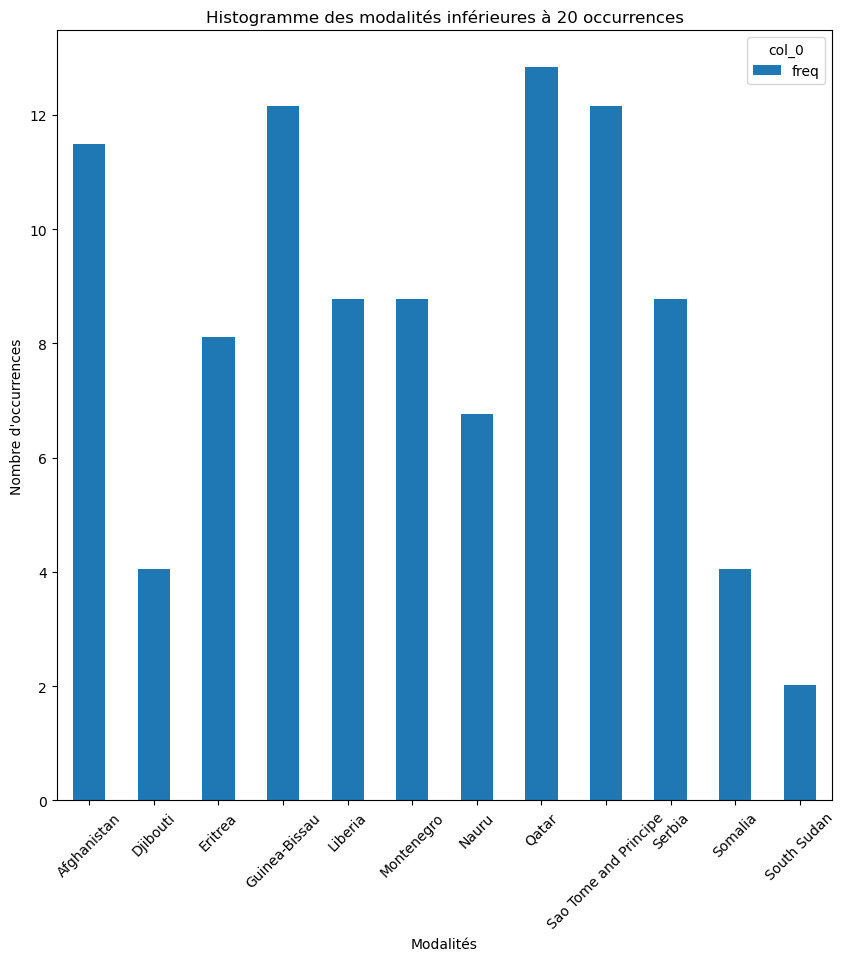

In [18]:



modalites = energy['Entity'].value_counts()
modalites_a_afficher = modalites[modalites < 20].index

# Filtrer le DataFrame pour ne conserver que les modalités sélectionnées
energy_filtre = energy[energy['Entity'].isin(modalites_a_afficher)]
t=pd.crosstab(energy_filtre.Entity,"freq", normalize=True)
(t * 100).plot(kind = "bar", figsize = (10, 10))
plt.title('Histogramme des modalités inférieures à 20 occurrences')
plt.xlabel('Modalités')
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.show()

Les relevés n'ont pas été faits à intervales réguliers dans tous les pays. Le Soudan du Sud, la Somalie et Djibouti ont moins de quatre occurences. L'échantillon de données que nous avons n'est pas représentatif de ces pays. Les analyses et prédictions que nous ferons pourraient donc être éloignées de la réalité. 

## Pour les variables quantitatives

In [19]:
energy.describe().round(2)

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
count,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00,2868.00
mean,76.58,62.17,35.80,76.69,15.34,26.60,39.63,26082.46,5.42,168818.22,3.90,12577.05,228.21,658166.76,18.14,12.97
std,31.51,39.24,30.02,374.42,78.78,107.64,34.45,37097.46,3.58,818020.25,4.65,18730.48,742.36,1705047.83,24.92,65.48
min,1.25,0.00,0.00,0.00,0.00,0.00,0.00,105.11,1.03,30.00,-36.66,111.93,2.00,21.00,-40.90,-175.20
25%,53.24,22.08,9.19,0.29,0.00,0.09,6.09,2779.97,3.28,2187.50,1.77,1209.80,31.00,29743.00,1.65,-10.94
50%,97.00,81.55,28.79,3.00,0.00,1.68,35.01,11922.76,4.40,10425.00,3.79,4168.11,83.00,131957.00,17.06,18.64
75%,100.00,100.00,60.67,25.79,0.00,10.10,66.88,31838.56,6.14,58145.00,5.96,14828.34,206.00,488100.00,39.40,43.68
max,100.00,100.00,96.04,5098.22,809.41,2014.57,100.00,262585.70,32.57,10707219.73,63.38,123514.20,8358.00,9984670.00,64.96,178.07


  Les variables correspondant à des pourcentages sont bien entre 0 et 100.
  L'émission de CO2 par pays varie entre 30 et plus de 10 millions kt. En moyenne, la quantité de CO2 par pays est de 168818.22 alors que la médiane est de 10425. On peut donc conclure que la moyenne d'émission de CO2 par pays est biaisée. Ce biais vient d'un petit nombre de grands pollueurs.  

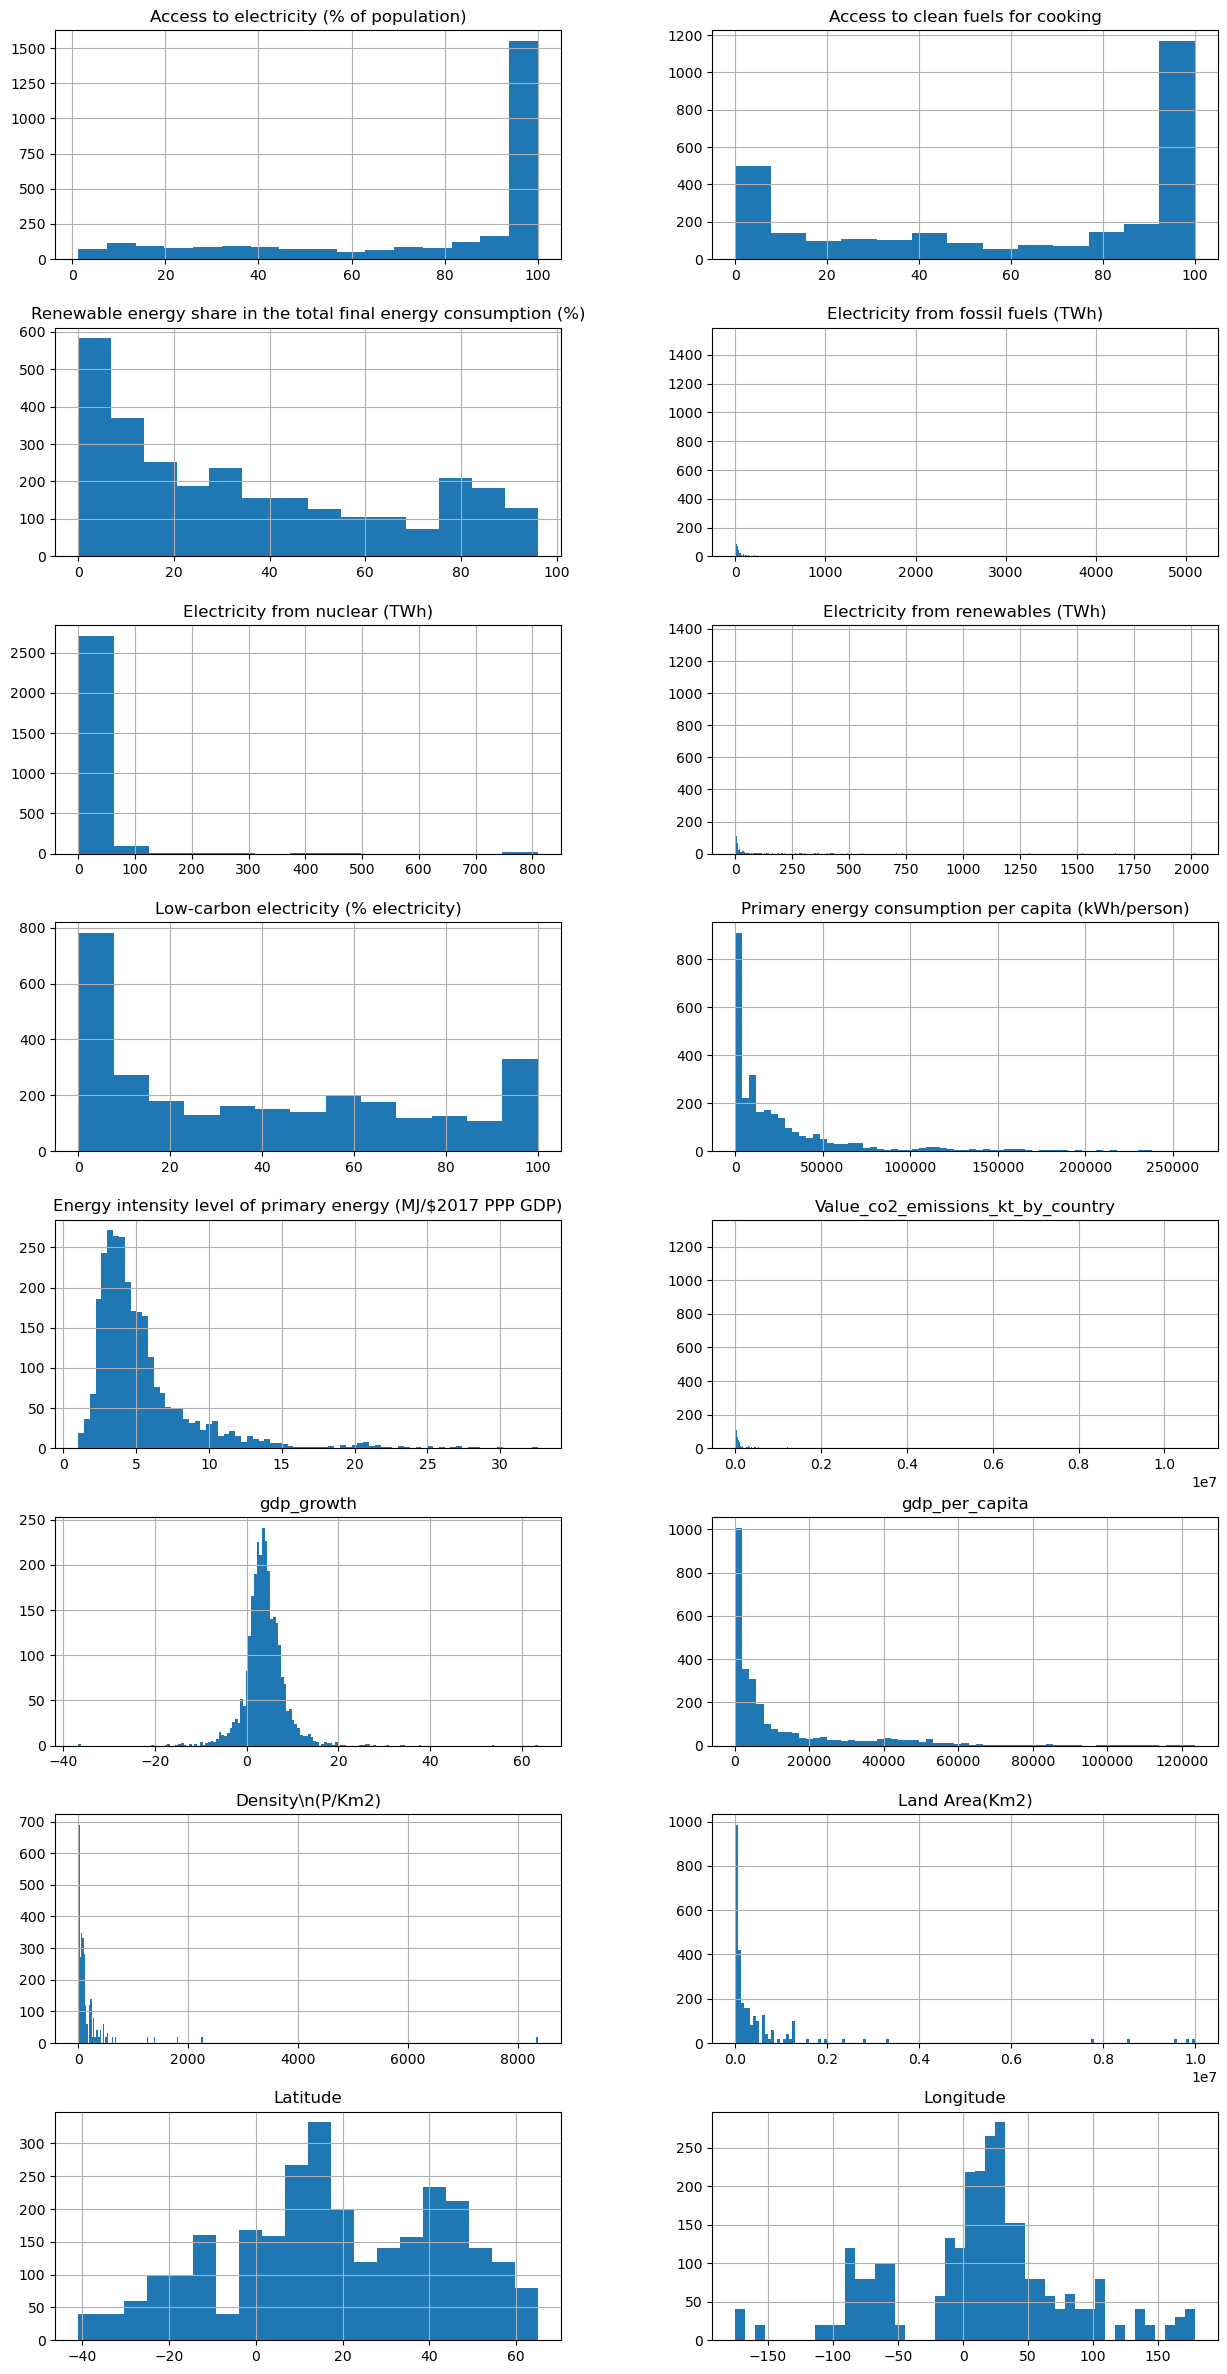

In [20]:

energy.hist(figsize = (15,30),layout=(8,2),bins='auto')
plt.show()

Les histogrammes nous montrent qu'à l'exception de gdp_growth,latitude et longitde, les variables ne sont pas symétriques et centrées autour d'une valeur. Ceci suggère des transformations pour une meilleure utilisation des modèles linéaires. Nous avons essayé plusieurs transformations de variables possibles et gardé celles qui nous semblaient les plus pertinentes. 

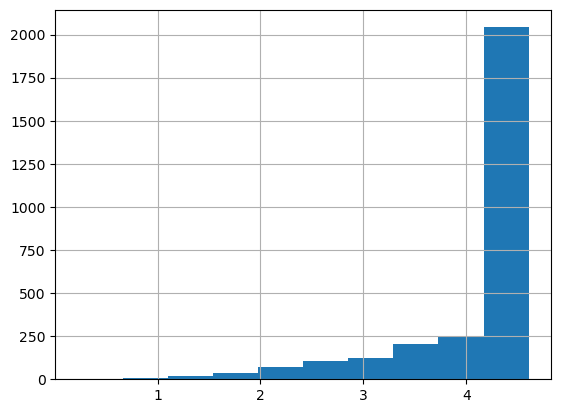

In [21]:
from math import sqrt, log
energy["SAccess to electricity (% of population)"]=energy["Access to electricity (% of population)"].map(lambda x: log(x))
energy["SAccess to electricity (% of population)"].hist()
plt.show()


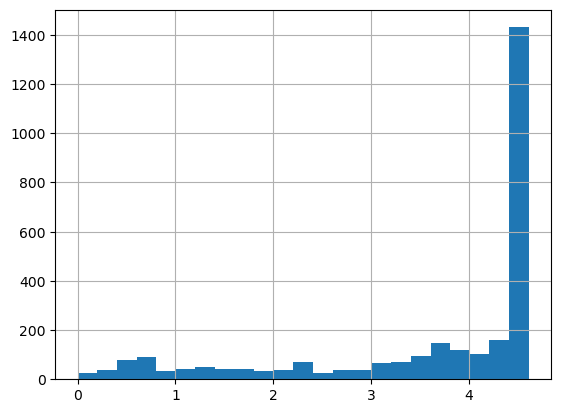

In [22]:
energy["SAccess to clean fuels for cooking"]=energy["Access to clean fuels for cooking"].map(lambda x: log(1+x))
energy["SAccess to clean fuels for cooking"].hist(bins='auto')
plt.show()


<Axes: >

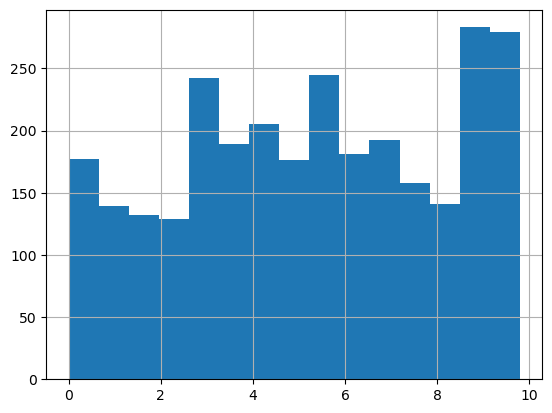

In [23]:

energy["SRenewable energy share in the total final energy consumption (%)"]=energy["Renewable energy share in the total final energy consumption (%)"].map(lambda x: sqrt(x))
energy["SRenewable energy share in the total final energy consumption (%)"].hist(bins='auto')

In [24]:
# energy["SRenewable energy share in the total final energy consumption (%)"]=energy["Renewable energy share in the total final energy consumption (%)"].map(lambda x: sqrt(x))
# energy["SElectricity from fossil fuels (TWh)"]=energy["Electricity from fossil fuels (TWh)"].map(lambda x: sqrt(x))
# energy["SElectricity from nuclear (TWh)"]=energy["Electricity from nuclear (TWh)"].map(lambda x: log(1+x))
# energy["SElectricity from renewables (TWh)"]=energy["Electricity from renewables (TWh)"].map(lambda x: log(1+x))
# energy["SLow-carbon electricity (% electricity)"]=energy["Low-carbon electricity (% electricity)"].map(lambda x: sqrt(x))
# energy["SPrimary energy consumption per capita (kWh/person)"]=energy["Primary energy consumption per capita (kWh/person)"].map(lambda x: log(sqrt(x)))
# energy["SEnergy intensity level of primary energy (MJ/$2017 PPP GDP)"]=energy["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"].map(lambda x: log(x))
# energy["Sgdp_per_capita"]=energy["gdp_per_capita"].map(lambda x:log(sqrt(x)))
# energy["SDensity\\n(P/Km2)"]=energy["Density\\n(P/Km2)"].map(lambda x:log(x))
# energy["SLand Area(Km2)"]=energy["Land Area(Km2)"].map(lambda x:log(x))
# energy["SValue_co2_emissions_kt_by_country"]=energy["Value_co2_emissions_kt_by_country"].map(lambda x:log(x))

<Axes: >

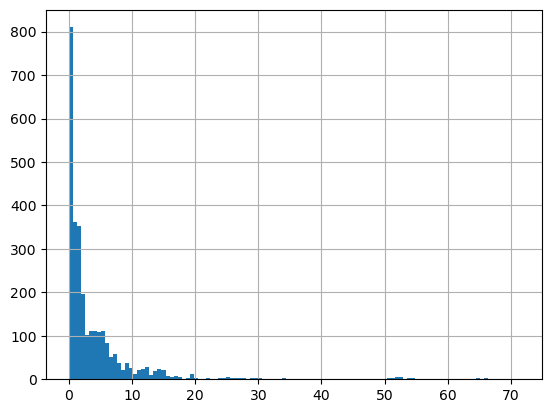

In [25]:
energy["SElectricity from fossil fuels (TWh)"]=energy["Electricity from fossil fuels (TWh)"].map(lambda x: sqrt(x))
energy["SElectricity from fossil fuels (TWh)"].hist(bins='auto')

<Axes: >

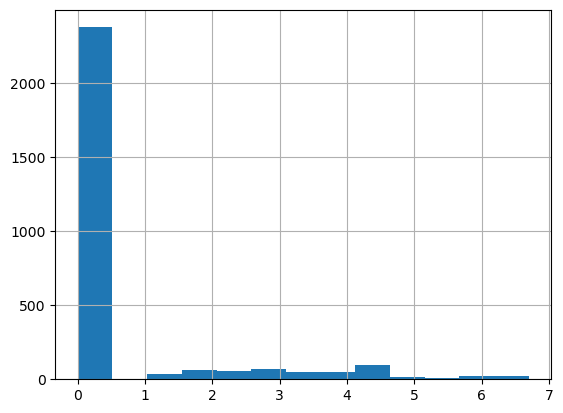

In [26]:
energy["SElectricity from nuclear (TWh)"]=energy["Electricity from nuclear (TWh)"].map(lambda x: log(1+x))
energy["SElectricity from nuclear (TWh)"].hist(bins='auto')

<Axes: >

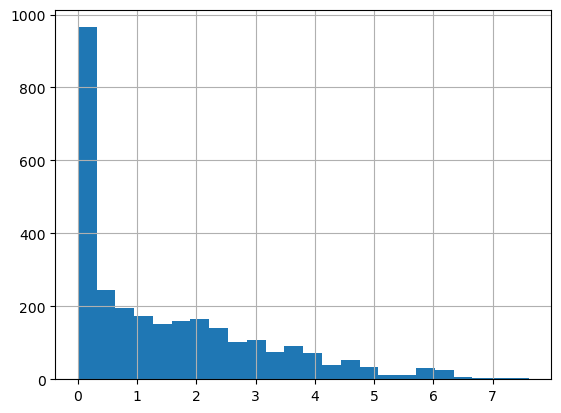

In [27]:
energy["SElectricity from renewables (TWh)"]=energy["Electricity from renewables (TWh)"].map(lambda x: log(1+x))
energy["SElectricity from renewables (TWh)"].hist(bins='auto')

<Axes: >

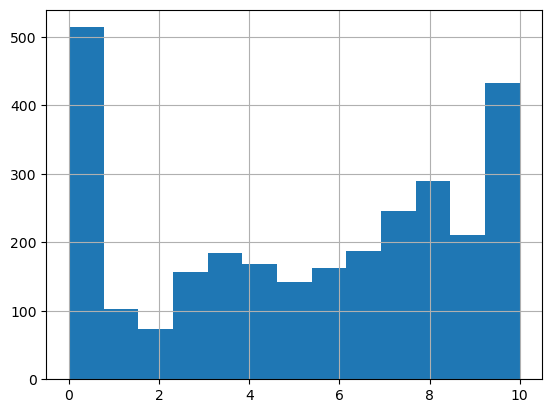

In [28]:
energy["SLow-carbon electricity (% electricity)"]=energy["Low-carbon electricity (% electricity)"].map(lambda x: sqrt(x))
energy["SLow-carbon electricity (% electricity)"].hist(bins='auto')

<Axes: >

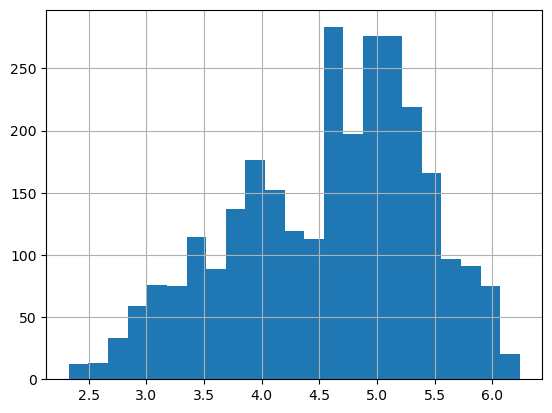

In [29]:
energy["SPrimary energy consumption per capita (kWh/person)"]=energy["Primary energy consumption per capita (kWh/person)"].map(lambda x: log(sqrt(x)))
energy["SPrimary energy consumption per capita (kWh/person)"].hist(bins='auto')

<Axes: >

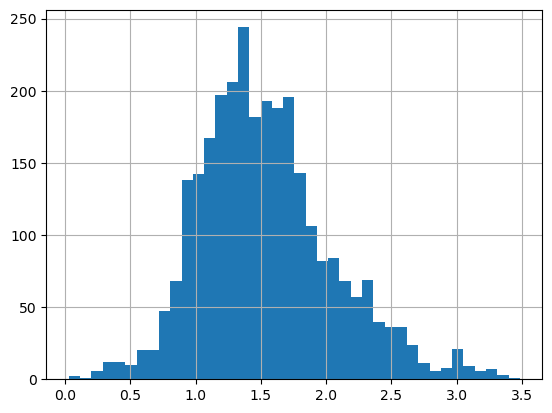

In [30]:
energy["SEnergy intensity level of primary energy (MJ/$2017 PPP GDP)"]=energy["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"].map(lambda x: log(x))
energy["SEnergy intensity level of primary energy (MJ/$2017 PPP GDP)"].hist(bins='auto')

<Axes: >

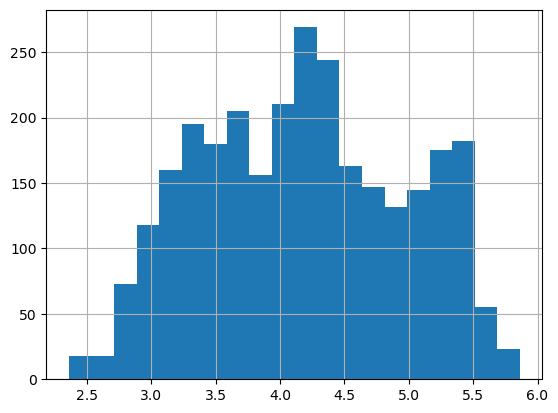

In [31]:
energy["Sgdp_per_capita"]=energy["gdp_per_capita"].map(lambda x:log(sqrt(x)))
energy["Sgdp_per_capita"].hist(bins='auto')

<Axes: >

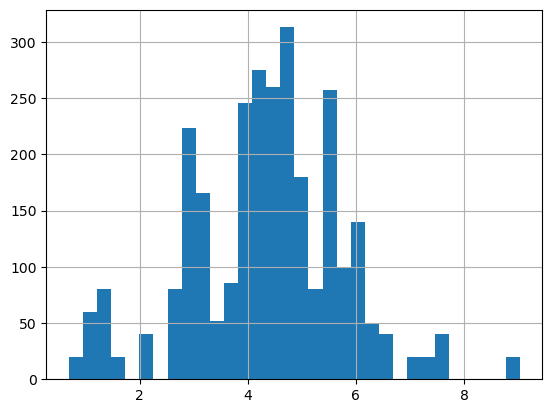

In [32]:
energy["SDensity\\n(P/Km2)"]=energy["Density\\n(P/Km2)"].map(lambda x:log(x))
energy["SDensity\\n(P/Km2)"].hist(bins='auto')

<Axes: >

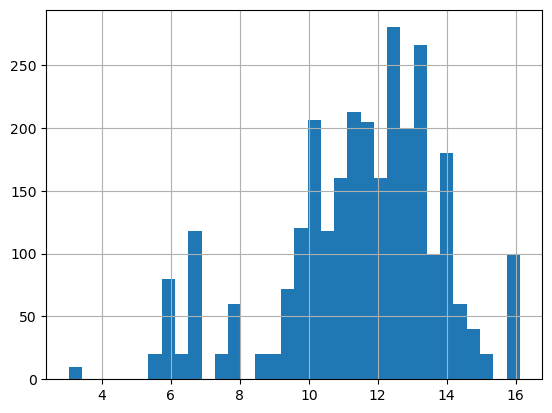

In [33]:
energy["SLand Area(Km2)"]=energy["Land Area(Km2)"].map(lambda x:log(x))
energy["SLand Area(Km2)"].hist(bins='auto')

<Axes: >

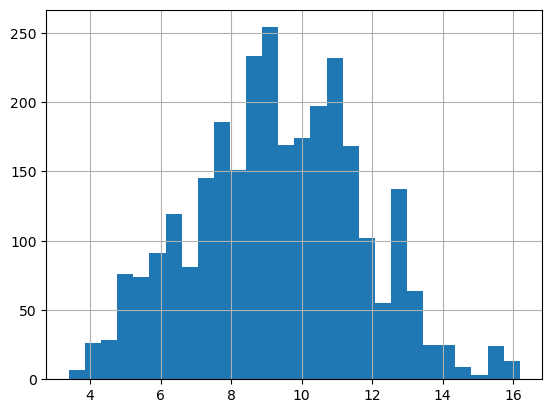

In [34]:
energy["SValue_co2_emissions_kt_by_country"]=energy["Value_co2_emissions_kt_by_country"].map(lambda x:log(x))
energy["SValue_co2_emissions_kt_by_country"].hist(bins='auto')

In [35]:


del energy['Renewable energy share in the total final energy consumption (%)']
del energy['Electricity from fossil fuels (TWh)']
del energy['Electricity from nuclear (TWh)']
del energy['Electricity from renewables (TWh)']
del energy['Low-carbon electricity (% electricity)']
del energy['Primary energy consumption per capita (kWh/person)']
del energy['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']
del energy['gdp_per_capita']
del energy['Density\\n(P/Km2)']
del energy['Land Area(Km2)']
#del energy['Value_co2_emissions_kt_by_country']
del energy['Access to clean fuels for cooking']
del energy['Access to electricity (% of population)']


Afin de mieux visualiser l'hétérogénéité de la variable Value_co2_emissions_kt_by_country, nous n'allons pas la supprimer à cette étape.

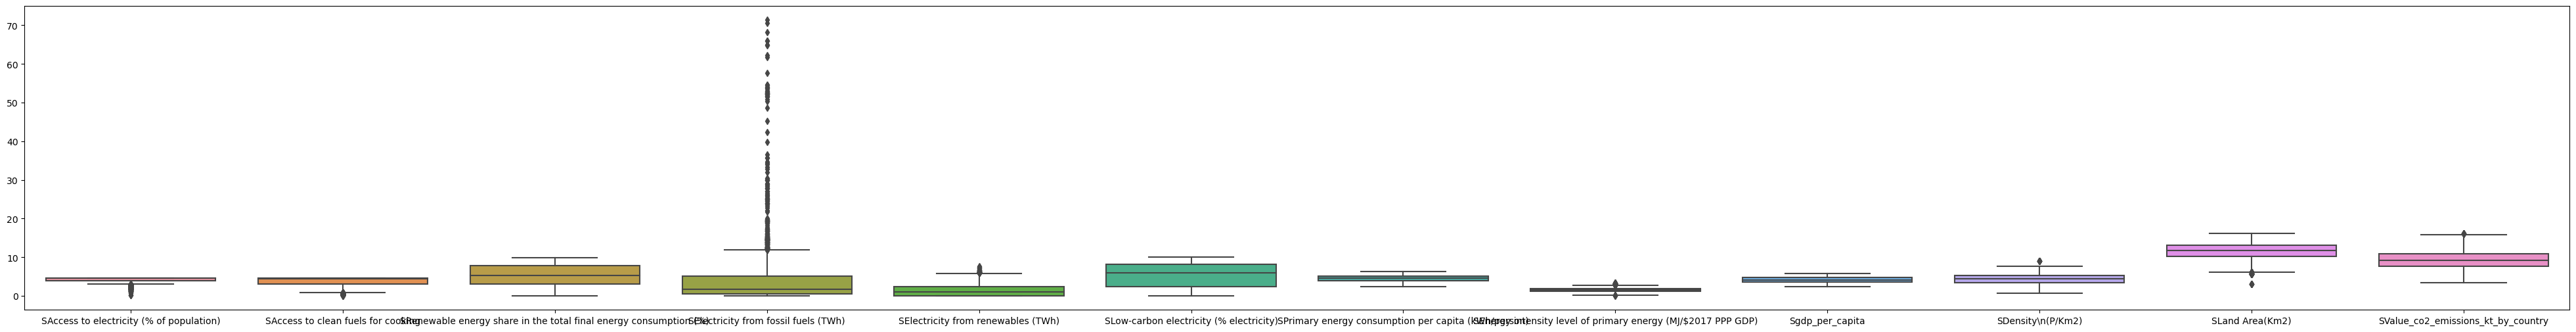

In [36]:
plt.figure(figsize=(50,6))
energy2=energy.drop(energy.columns[3],axis=1)
energy2=energy2.drop(energy2.columns[0],axis=1)
energy2=energy2.drop(energy2.columns[0],axis=1)
energy2=energy2.drop(energy2.columns[0],axis=1)
energy2=energy2.drop(energy2.columns[0],axis=1)
energy2=energy2.drop(energy2.columns[0],axis=1)
energy2=energy2.drop(energy2.columns[4],axis=1)
sns.boxplot(data=energy2)

plt.show()

Les transformations réalisées ont permis de rendre toutes les variables ci dessus symétriques sauf Access to electricity (% of population) et Access to clean fuels for cooking.

<Axes: >

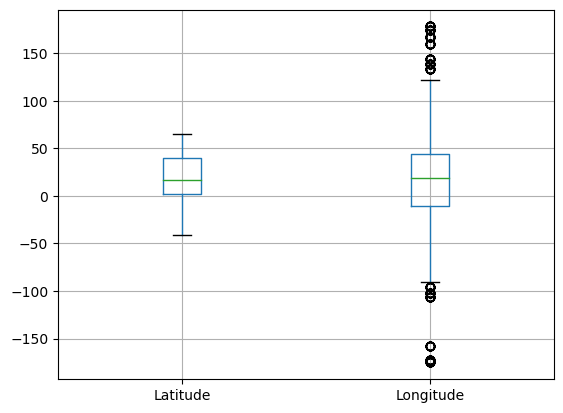

In [37]:
energy.describe()
energy3=energy[['Latitude','Longitude']]
energy3.boxplot()

On contsate que les variables Latitude et Longitude sont symétriques sans passer par une transformation. Le boxplot de Longitude comporte des outliers, des valeurs de longitude isolées ont donc été prises.

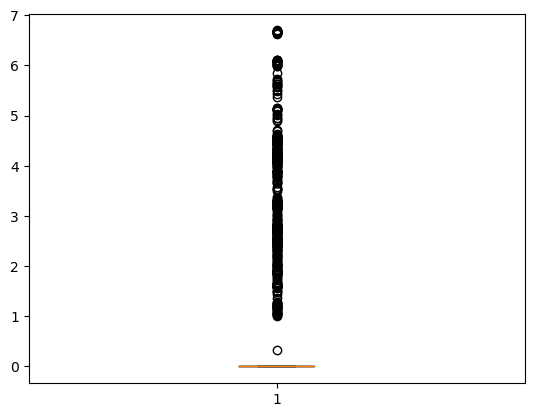

In [38]:
plt.boxplot(energy['SElectricity from nuclear (TWh)'])
plt.show()

Le boxplot de Electricity from nuclear (TWh) comporte beaucoup d'outliers. Cela peut être expliqué par le fait que tous les pays n'ont pas le même accès au nucléaire.

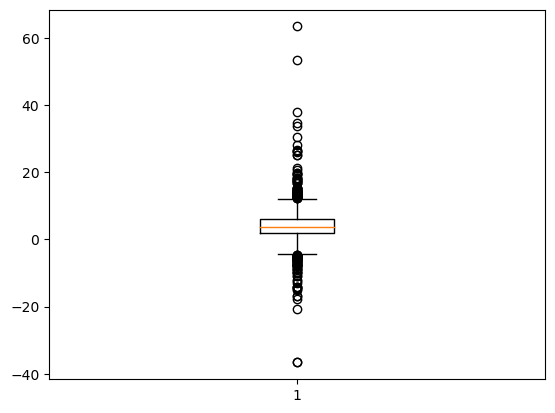

In [39]:
plt.boxplot(energy['gdp_growth'])
plt.show()

Le boxplot du taux de croissance annuel du PIB montre que les données sont sur une grande étendue. De plus, on remarque la présence d'outliers suggérant une grande variabilité dans les performances économiques entre les nations. Ces valeurs abbérantes pourraient indiquer des facteurs économiques affectant certains pays de manière significative.

# Q5 

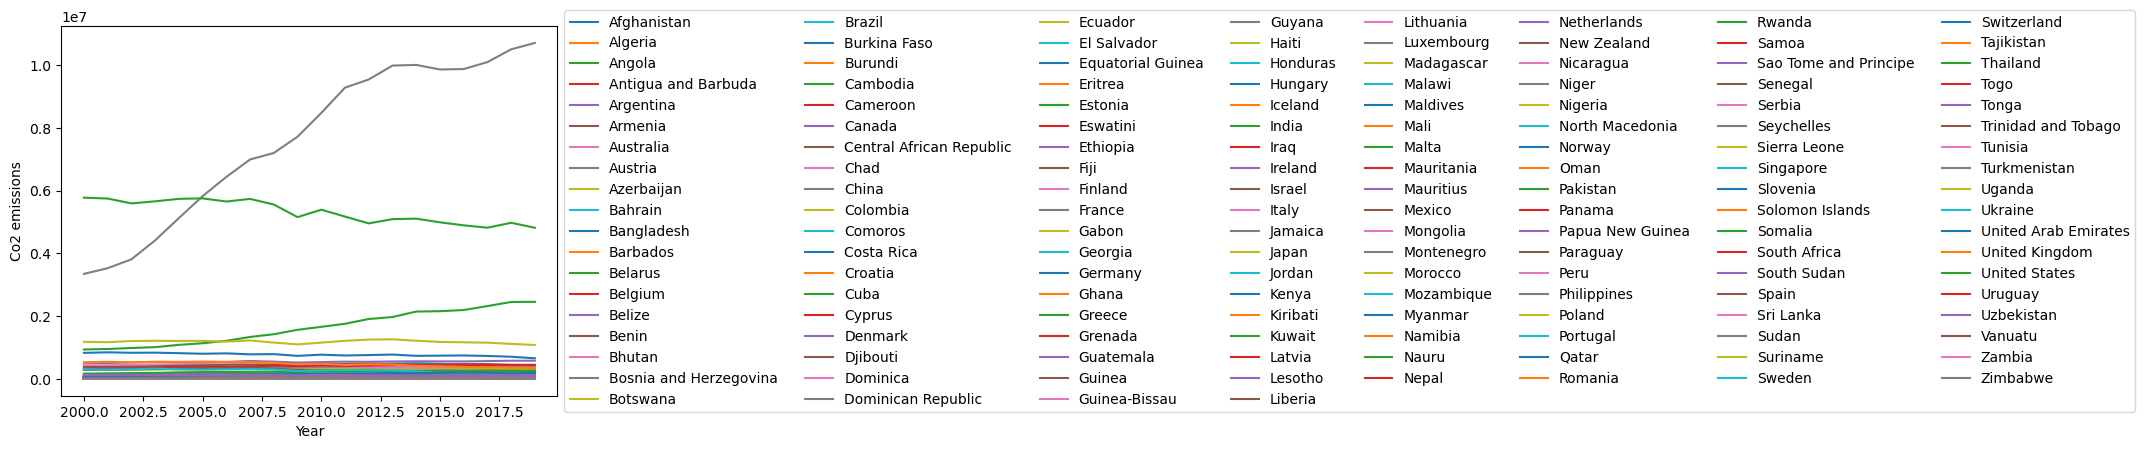

In [40]:
pays = energy['Entity'].unique()

# Plotting using Matplotlib
for i, p in enumerate(pays):
    country_data = energy[energy['Entity'] == p]
    plt.plot(country_data['Year'], country_data['Value_co2_emissions_kt_by_country'], label=p)

plt.xlabel('Year')
plt.ylabel('Co2 emissions')
plt.legend(loc='center left', ncol=8, bbox_to_anchor=(1, 0.5), borderaxespad=0.5)
plt.show()

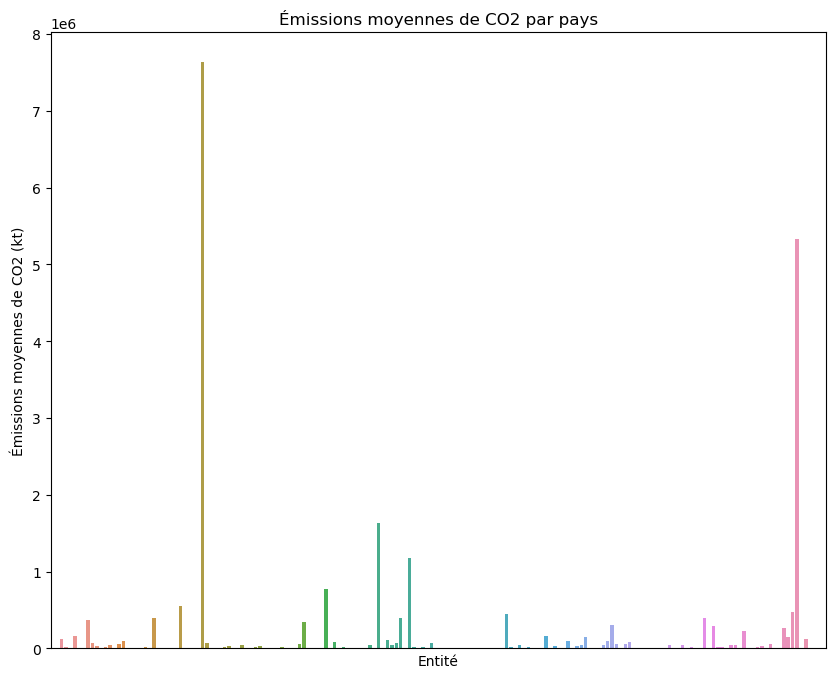

In [41]:
Moy = energy.groupby('Entity')['Value_co2_emissions_kt_by_country'].mean().reset_index()
Moy_classe = Moy.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False).dropna()



plt.figure(figsize=(10, 8))
sns.barplot(x='Entity', y='Value_co2_emissions_kt_by_country', data=Moy_classe)
plt.xlabel('Entité')
plt.ylabel('Émissions moyennes de CO2 (kt)')
#plt.xticks(rotation=90)
plt.xticks([]) # Enlève les légendes de l'axe des x
plt.title('Émissions moyennes de CO2 par pays')
plt.show()

On remarque sur ces graphiques que la plupart des pays ont une émission CO2 très basse mais quelques uns ont une émission presque 6 fois supérieure. Nous allons donc déterminer les pays les plus émetteurs de CO2.

In [42]:
# Calculating standard deviation
sd = energy['Value_co2_emissions_kt_by_country'].std()
m=energy['Value_co2_emissions_kt_by_country'].mean()
minCO2=energy['Value_co2_emissions_kt_by_country'].min()
maxCO2=energy['Value_co2_emissions_kt_by_country'].max()
print("Standard deviation:", sd)
print("Mean:", m)
print("Min:", minCO2)
print("Max:", maxCO2)


Standard deviation: 818020.2459125534
Mean: 168818.21810476022
Min: 30.0
Max: 10707219.73


L'écart-type étant très grand, cela confirme la grande disparité d'émission de CO2 entre les individus.

In [43]:
print(Moy_classe.head(-5))

                       Entity  Value_co2_emissions_kt_by_country
34                      China                       7.636642e+06
169             United States                       5.329539e+06
74                      India                       1.633979e+06
81                      Japan                       1.183734e+06
62                    Germany                       7.736445e+05
..                        ...                                ...
68              Guinea-Bissau                       2.472222e+02
136                     Samoa                       2.120000e+02
31   Central African Republic                       2.065000e+02
45                   Dominica                       1.860000e+02
36                    Comoros                       1.720000e+02

[143 rows x 2 columns]


Les 5 pays les plus émetteurs de CO2 entre 2000 et 2019 sont la Chine, les États-Unis d'Amérique, l'Inde, le Japon et l'Allemagne. On remarque que les pays sur le podium ont une grande population, cela peut expliquer cette grande émission.

# 6

# Entre variables quantitatives

In [44]:
#del energy['Value_co2_emissions_kt_by_country']

In [45]:
from pandas.plotting import scatter_matrix

In [46]:
!pip install pyensae

Defaulting to user installation because normal site-packages is not writeable


/home/jsouffle/.local/lib/python3.11/site-packages/pyensae/graphhelper/corrplot.py:77: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  if self.df.max().max() > 1 or self.df.min().min() < -1:
/home/jsouffle/.local/lib/python3.11/site-packages/pyensae/graphhelper/corrplot.py:85: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = self.df.corr()
/home/jsouffle/.local/lib/python3.11/site-packages/pyensae/graphhelper/linkage.py:43: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = linkage(D, method=meth

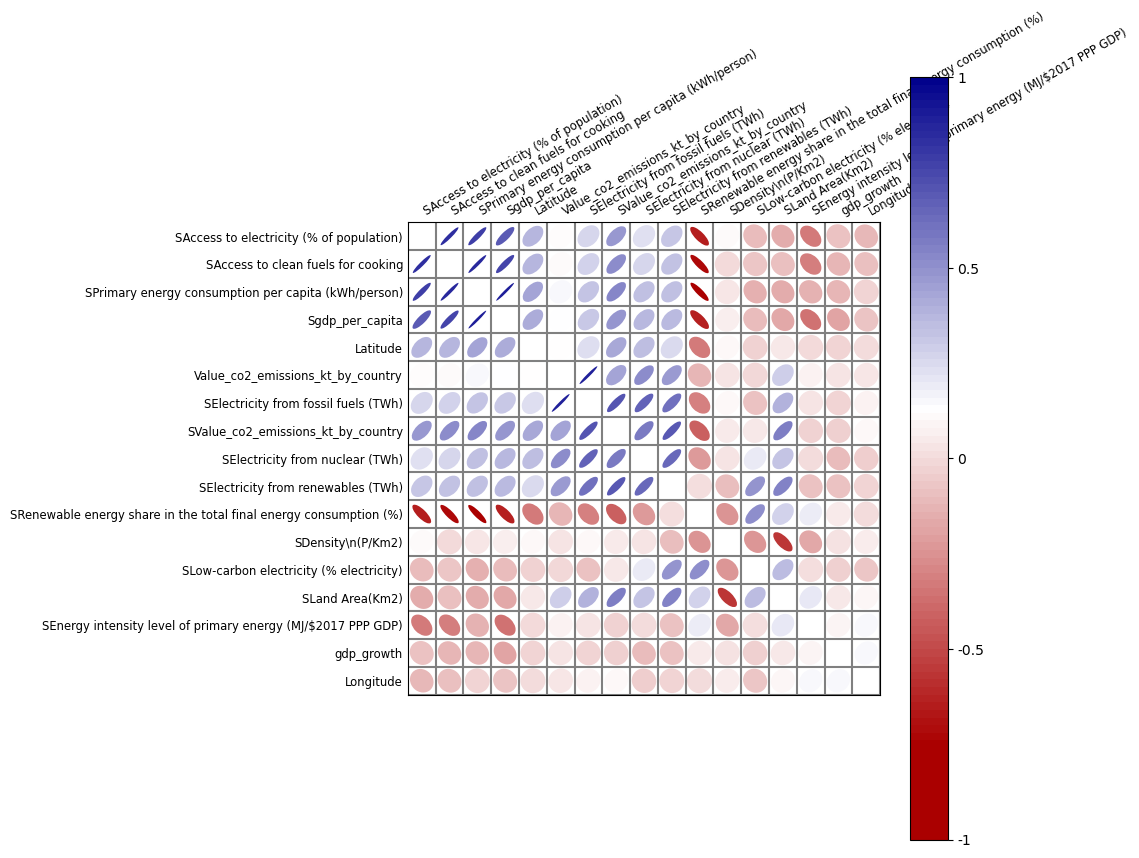

In [47]:
from pyensae.graphhelper import Corrplot

c = Corrplot(energy)
c.plot(figsize=(12,12))
#plt.legend(loc='center left', ncol=8, bbox_to_anchor=(1, 0.5))
plt.show()

In [48]:
#energy.corr()

Sur ce corrplot on distingue quatre principaux groupes de variables linéairement corrélées. L'accès à l'électricité et aux carburants propres, la consommation d'énergie par personnes et le PIB/personnes sont liées positivement. 
Ceci semble indiquer que les pays riches ont plus accès à l'électricité et aux carburants propres, ce qui leur permet de consommer plus d'énergie.
 
L'émission de CO2 par pays, la quantité d'électricité renouvelable, fossile et nucéaire, sont également corrélées positivement. Cela peut être dû au fait que la production d'énergie pollue.

Le pourcentage d'énergie renouvelable total est lié négativement à l'accès à l'électricité et aux carburants propres, la consommation d'énergie par personnes et le PIB/personnes. Ceci peut être expliqué par le fait que si un pays riche a accès à beaucoup d'énergies et consomme en conséquence, les sources sont diversifiées, la part de renouvelable est donc diluée.


Enfin, on remarque que la densité et la superficie sont corrélées négativement. La densité étant calculée comme la population sur la superficie, il est logique que plus la superficie est grande (à population fixe), plus la densité diminue.

On note que la variable à prédire est liée positivement avec la quantité d'électricité renouvelable, fossile et nucéaire ainsi que la superficie, et liée négativement avec le pourcentage d'énergie renouvelable. 

# Variables qualitatives

In [49]:
crosstable=pd.crosstab(energy['Entity'],energy['Year'])
crosstable

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Entity,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Algeria,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Angola,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Antigua and Barbuda,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Argentina,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Uzbekistan,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Vanuatu,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


On note que par année, les relevés se font 1 ou 0 fois par pays.

# co2 et Year

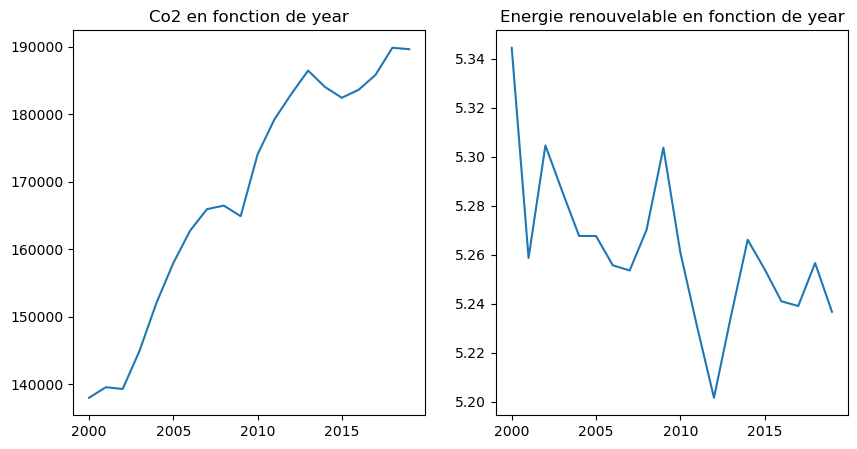

In [50]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
Moy = energy.groupby('Year')['Value_co2_emissions_kt_by_country'].mean().reset_index()
#Moy_classe = Moy.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False)
df=energy
#df['Year']= pd.to_numeric(    
plt.plot(np.linspace(2000,2019,20),Moy['Value_co2_emissions_kt_by_country'].dropna())
#plt.xticks(np.arange(2000,2019,20),np.arange(2000,2019,20))
plt.title("Co2 en fonction de year")
#plt.legend()


plt.subplot(1,2,2)
Moy = energy.groupby('Year')['SRenewable energy share in the total final energy consumption (%)'].mean().reset_index()
#Moy_classe = Moy.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False)
df=energy
#df['Year']= pd.to_numeric(    
plt.plot(np.linspace(2000,2019,20),Moy['SRenewable energy share in the total final energy consumption (%)'].dropna())
#plt.xticks(np.arange(2000,2019,20),np.arange(2000,2019,20))
#plt.legend()
plt.title('Energie renouvelable en fonction de year')
plt.show()

#plt.xticks()


L'émission en CO2 a considérablement augmenté dans le temps. Néanmoins, on note un déclin en  2009 qui pourraient s'expliquer par la crise des subprimes qui a affecté la croissance financière mondiale et donc limité la pollution. En outre, entre 2013 et 2015, on note une légère baise de la quantité moyenne de CO2 émise. Elle pourrait s'expliquer par une prise de conscience mondiale qui a encouragé l'utisation d'énergie renouvelable. La quantité de CO2 émise par pays est donc fortement liée à la variable Year.


In [51]:
energy.groupby("Year")['Value_co2_emissions_kt_by_country'].agg([np.mean, np.std, np.median]).dropna()

,mean,std,median
Year,,,
2000,138016.423358,586021.730034,9000.000000
2001,139578.188406,589751.490220,9045.000000
2002,139321.070047,588124.368169,8985.000133
2003,144971.775235,619667.977855,9310.000420
2004,152039.360934,661777.718380,9560.000420
2005,157939.574784,702156.484313,10510.000230
2006,162745.391503,733594.069242,9970.000267
2007,165933.054883,766181.283626,10075.000284
2008,166458.124618,770546.372457,9699.999810


In [52]:
del energy['Value_co2_emissions_kt_by_country']

# ACP

Avant de faire une analyse en composantes principales (ACP), nous allons centrer et réduire nos données puisque les variables n'ont pas les mêmes unités. Comme le montre les boxplots de IV, les données ne sont également pas à la même échelle. L'ACP ne se faisant que sur les variables quantitatives, nous allons également enlever les variables Entity et Year.

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
energy2=energy.drop(energy.columns[0],axis=1)
energy2=energy2.drop(energy2.columns[0],axis=1)
energy_scale=scale(energy2)

In [54]:
energy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2868 entries, 3 to 3647
Data columns (total 16 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   gdp_growth                                                         2868 non-null   float64
 1   Latitude                                                           2868 non-null   float64
 2   Longitude                                                          2868 non-null   float64
 3   SAccess to electricity (% of population)                           2868 non-null   float64
 4   SAccess to clean fuels for cooking                                 2868 non-null   float64
 5   SRenewable energy share in the total final energy consumption (%)  2868 non-null   float64
 6   SElectricity from fossil fuels (TWh)                               2868 non-null   float64
 7   SElectricity from nuclea

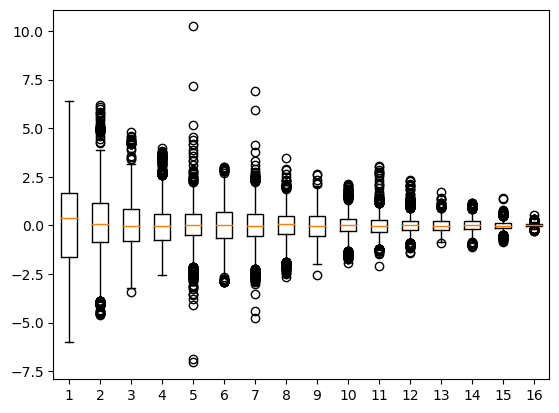

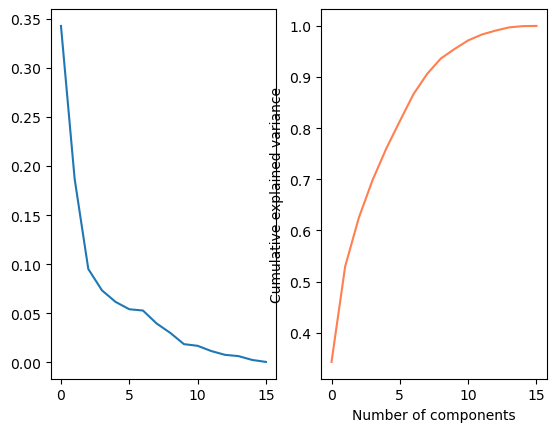

In [55]:
pca = PCA()

C = pca.fit(energy_scale).transform(energy_scale)
plt.boxplot(C)
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2)
#plt.subplot(1,2,2)
ax1.plot(pca.explained_variance_ratio_)
#plt.show()
#plt.subplot(2,2,2)
ax2.plot(np.cumsum(pca.explained_variance_ratio_), color='coral')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');


Afin d'expliquer environ 75% de la variance de notre jeu de données, nous choisissons de garder 5 dimensions. Ces 5 dimensions permettent de capturer les principales structures de variations de données tout en réduisant le nombre de variables.  

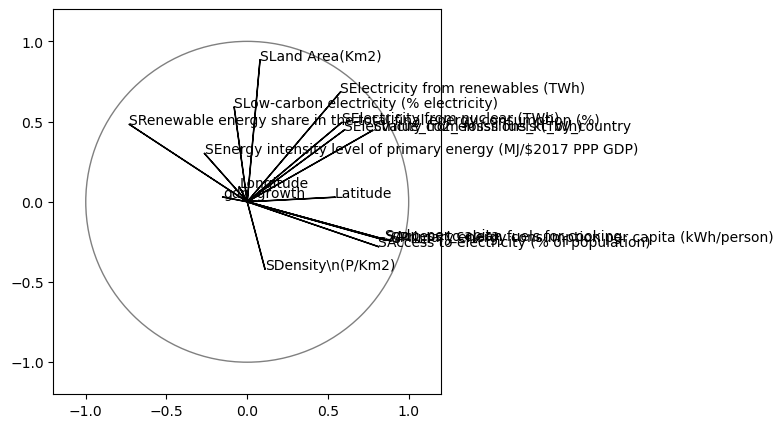

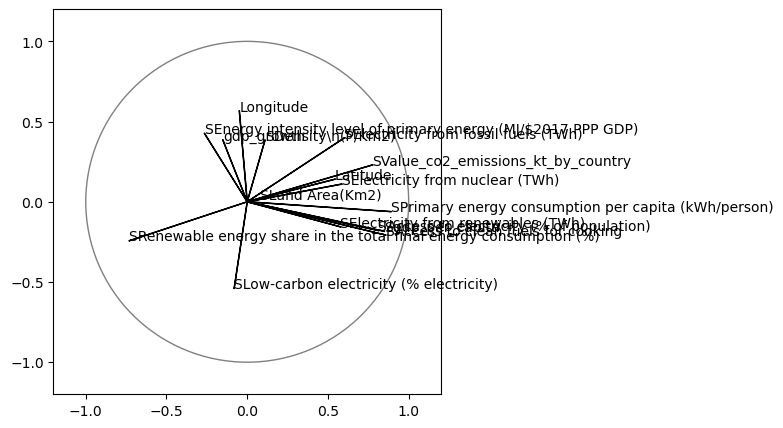

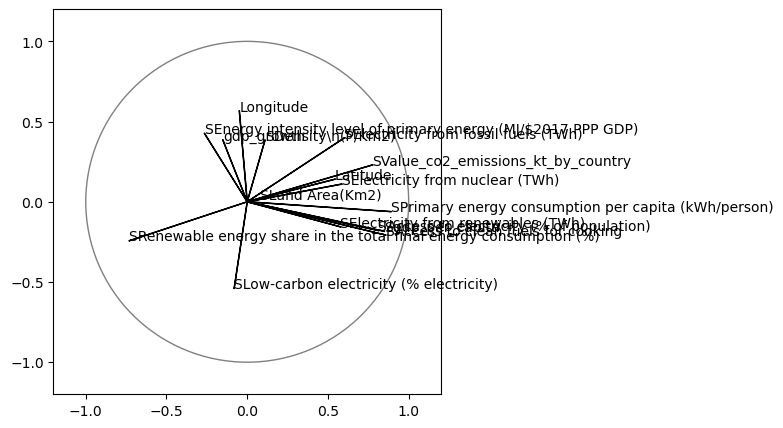

In [56]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, energy2.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()



coord3=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord3, energy2.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()



coord4=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord4, energy2.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

Au vu du grand nombre de variables que nous avons, le graphe des variables est illisible. Cependant, nous pouvons déjà remarquer que toutes nos variables sont bien représentées dans au moins un plan d'ACP. Les 6 dimensions choisies sont donc un bon espace de projection de nos données. Afin d'interpréter chacune des dimensions, nous allons calculer leur corrélation avec nos variables.

Sur R nous avons représenté la matrice des corrélations:

- La dimension 1 est corrélée positivement avec Access_to_Electricity, Access_Clean_Fuel, Primary_energy_consumption, gdp_per_capita, l'émission de CO2 par pays, la quantité d'électricité renouvelable, fossile et nucéaire. Ces variables formaient déjà un groupe de variables fortement correlées à la question 6. La dimension 1 porte donc l'information apportée par ces variables. Le pourcentage d'énergie renouvelable total étant négativement correlé à ce groupe, il l'est également à la dimension 1. Cette composante représente donc l'opposition entre les éléments qui émettent beaucoup de CO2 et ceux considérés plus "verts".

- La dimension 2 est fortement correlée avec la superficie et négativement avec la densité. Elle porte donc l'information sur la taille des pays.

Les dimensions suivantes ne portant qu'un faible pourcentage de la variance, leur interpretation apporte peu d'information.

In [57]:
del energy['SElectricity from fossil fuels (TWh)']

In [58]:
energy.describe()

,gdp_growth,Latitude,Longitude,SAccess to electricity (% of population),SAccess to clean fuels for cooking,SRenewable energy share in the total final energy consumption (%),SElectricity from nuclear (TWh),SElectricity from renewables (TWh),SLow-carbon electricity (% electricity),SPrimary energy consumption per capita (kWh/person),SEnergy intensity level of primary energy (MJ/$2017 PPP GDP),Sgdp_per_capita,SDensity\n(P/Km2),SLand Area(Km2),SValue_co2_emissions_kt_by_country
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000
mean,3.895326,18.140402,12.970486,4.160131,3.632823,5.261295,0.580774,1.504984,5.286579,4.576974,1.540333,4.178373,4.349602,11.521173,9.329532
std,4.645613,24.924975,65.478645,0.743819,1.349535,2.850207,1.411873,1.596120,3.418414,0.822569,0.517348,0.791067,1.406022,2.368012,2.384950
min,-36.658153,-40.900557,-175.198242,0.224957,0.000000,0.000000,0.000000,0.000000,0.000000,2.327504,0.029559,2.358924,0.693147,3.044522,3.401197
25%,1.770575,1.650801,-10.940835,3.974769,3.138748,3.031089,0.000000,0.086178,2.468009,3.965097,1.187843,3.549106,3.433987,10.300349,7.690513
50%,3.788166,17.060816,18.643501,4.574711,4.413404,5.365631,0.000000,0.985817,5.916901,4.693102,1.481605,4.167609,4.418841,11.790231,9.251961
75%,5.957490,39.399872,43.679291,4.605170,4.615121,7.788934,0.000000,2.407170,8.177977,5.184217,1.814825,4.802148,5.327876,13.098276,10.970695
max,63.379875,64.963051,178.065032,4.605170,4.615121,9.800000,6.697540,7.608657,10.000000,6.239166,3.483392,5.862056,9.030974,16.116561,16.186429


## Extraction des échantillons d'apprentissage et test

Nous alllons construire la matrice de design qui rassemble toutes les variables explicatives. Entity et Year étant des variables qualitatives, nous allons créer des variables indicatrices codant les différentes modalités.

In [127]:
energyQuant=energy.drop(energy.columns[0],axis=1)
energyQuant=energyQuant.drop(energyQuant.columns[0],axis=1)                                       

In [128]:
energyQuant=energyQuant.drop(energyQuant.columns[14],axis=1)
energyQuant.describe()

,gdp_growth,Latitude,Longitude,SAccess to electricity (% of population),SAccess to clean fuels for cooking,SRenewable energy share in the total final energy consumption (%),SElectricity from nuclear (TWh),SElectricity from renewables (TWh),SLow-carbon electricity (% electricity),SPrimary energy consumption per capita (kWh/person),SEnergy intensity level of primary energy (MJ/$2017 PPP GDP),Sgdp_per_capita,SDensity\n(P/Km2),SLand Area(Km2)
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000
mean,3.895326,18.140402,12.970486,4.160131,3.632823,5.261295,0.580774,1.504984,5.286579,4.576974,1.540333,4.178373,4.349602,11.521173
std,4.645613,24.924975,65.478645,0.743819,1.349535,2.850207,1.411873,1.596120,3.418414,0.822569,0.517348,0.791067,1.406022,2.368012
min,-36.658153,-40.900557,-175.198242,0.224957,0.000000,0.000000,0.000000,0.000000,0.000000,2.327504,0.029559,2.358924,0.693147,3.044522
25%,1.770575,1.650801,-10.940835,3.974769,3.138748,3.031089,0.000000,0.086178,2.468009,3.965097,1.187843,3.549106,3.433987,10.300349
50%,3.788166,17.060816,18.643501,4.574711,4.413404,5.365631,0.000000,0.985817,5.916901,4.693102,1.481605,4.167609,4.418841,11.790231
75%,5.957490,39.399872,43.679291,4.605170,4.615121,7.788934,0.000000,2.407170,8.177977,5.184217,1.814825,4.802148,5.327876,13.098276
max,63.379875,64.963051,178.065032,4.605170,4.615121,9.800000,6.697540,7.608657,10.000000,6.239166,3.483392,5.862056,9.030974,16.116561


Nous n'allons pas inclure la variable Entity dans nos variables explicatives car nous n'avons que 20 observations par pays. De plus, cette variable ayant 147 modalités, nous aurions trop de paramètres à estimer

In [129]:
energyDum=pd.get_dummies(energy[["Year"]])


dfC=pd.concat([energyDum, energyQuant],axis=1)
dfC.head()

,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,...,SAccess to clean fuels for cooking,SRenewable energy share in the total final energy consumption (%),SElectricity from nuclear (TWh),SElectricity from renewables (TWh),SLow-carbon electricity (% electricity),SPrimary energy consumption per capita (kWh/person),SEnergy intensity level of primary energy (MJ/$2017 PPP GDP),Sgdp_per_capita,SDensity\n(P/Km2),SLand Area(Km2)
3,0,0,0,1,0,0,0,0,0,0,...,2.351375,6.054750,0.0,0.488580,8.186653,2.718971,0.336472,2.625308,4.094345,13.388153
4,0,0,0,0,1,0,0,0,0,0,...,2.476538,6.651316,0.0,0.444686,7.932298,2.659626,0.182322,2.676834,4.094345,13.388153
5,0,0,0,0,0,1,0,0,0,0,...,2.580217,5.820653,0.0,0.463734,7.964977,2.764852,0.343590,2.744534,4.094345,13.388153
6,0,0,0,0,0,0,1,0,0,0,...,2.698000,5.647123,0.0,0.494696,8.728716,2.859206,0.405465,2.787470,4.094345,13.388153
7,0,0,0,0,0,0,0,1,0,0,...,2.791165,5.364699,0.0,0.559616,8.885233,2.935044,0.425268,2.942626,4.094345,13.388153


In [130]:
Y=energy["SValue_co2_emissions_kt_by_country"]

Avant de commencer à créer des modèles de prédiction de la variable CO2, nous allons séparer notre jeu de donnnées en deux parties: un échantillon d'apprentissage et un échantillon test. Cette étape est primordiale lorsqu'on s'intéresse aux performances des modèles. En effet, la performance des algorithmes s'évalue par une estimation de l'erreur de généralisation Rp (page 10-11). L'objectif est de trouver une bonne règle de prédiction pour chaque modèle puis de sélectionner, étant donné une collection de modèle, celui avec le plus petit risque et d'avoir une idée de la qualité de prédiction du modèle sélectionné. Celui ci est minimisé lorsqu'on l'estime par le risque empirique Rn qui s'évalue sur l'échantillon d'apprentissage (p11). Rn conduit également à un modèle surajusté. Il faut donc un nouveau jeu de données indépendant de celui utilisé pour créer le modèle d'apprentissage. C'est pourquoi, avec la bibliothèque train_test_split, nous allons créer un nouvel échantillon extrait  du jeu de données initial. Ce tirage représentatif de l'ensemble des données sera aléatoire afin de garantir l'indépendance entre l'échantillon de test et d'apprentissage.

L'échantillion d'apprentissage sera utilisé pour estimer les paramètres des modèles et choisir le meilleur pour chaque méthode grâce à la validation croisée. 
L'échantillon de test sera utilisé à postériori pour évaluer l'erreur de généralisation de tous nos modèles pour ne retenir que les plus performants.. 

In [142]:
from sklearn.model_selection import train_test_split 
t_size= int(0.2*energy.shape[0])
X1_train,X1_test,Y_train,Y_test=train_test_split(dfC,Y,test_size=t_size,random_state=11)
#Standardisation
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X1_train)  
X_train = scaler.transform(X1_train)  
# Meme transformation sur le test
X_test = scaler.transform(X1_test)


# III- Modèle de prédiction

# Prévision par Regression

### Sans sélection de variables

Nous allons supposer que la quantité de CO2  Y émise vérifie:

$$Y= X\theta + \epsilon$$ 
Avec X la matrice de design, $\theta$ un vecteur de taille p=211 contenant tous les paramètres à estimer, et $\epsilon$ un vecteur gaussien de taille n=2868 centré et de variance $\sigma²I_n$ et représentant les ereurs.
$$$$
L'objectif est d'estimer $\theta$ 

In [143]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)
prev=reg.predict(X_train)


In [144]:
from sklearn.metrics import r2_score
#print("MSE=",mean_squared_error(Y_train,prev))
print("R2=",r2_score(Y_train,prev))

R2= 0.9816764662032302


On obtient un $R^2$ de 0.98. Ce qui est très proche de 1. Le modèle semble donc bien expliquer la quantité de CO2 émise mais il y a un risque de surajustement. 

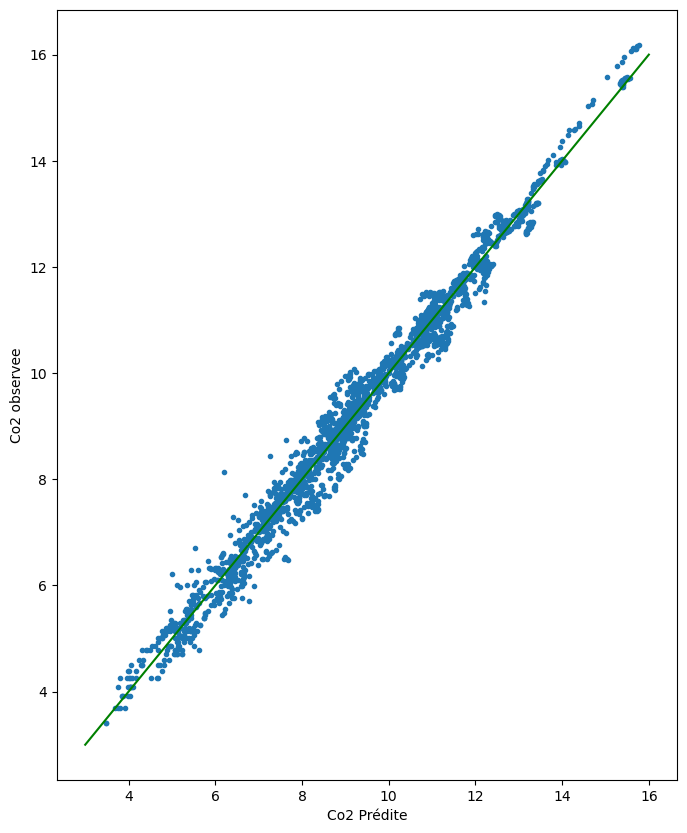

In [145]:
plt.plot(prev,Y_train,".")
bis=range(3,17)
plt.plot(bis,bis,color='green')
plt.xlabel(u"Co2 Prédite")
plt.ylabel("Co2 observee")
plt.show()

En traçant les valeurs observées  en fonction des valeurs prédites, on remarque  que les points sont alignés le long de la première bissectrice. Le modèle a donc bien prédit les valeurs de notre échantillon de test. 

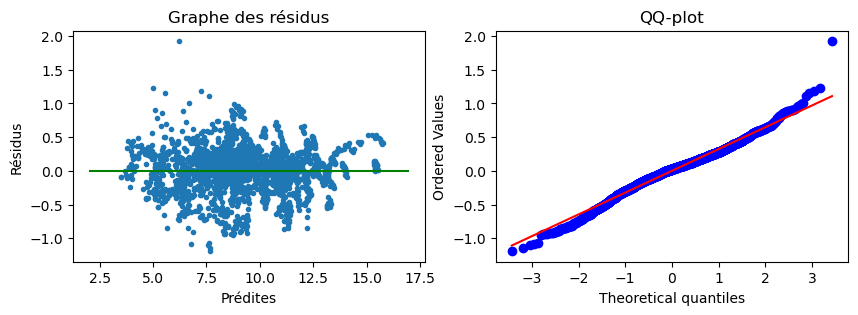

In [146]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.plot(prev,Y_train-prev,".")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,2,17,color='green')
plt.title('Graphe des résidus')
#plt.show()

import numpy as np 
import pylab 
import scipy.stats as stats
plt.subplot(1,2,2)  
stats.probplot(Y_train-prev, dist="norm", plot=pylab)
plt.title('QQ-plot')
pylab.show()

- D'après le graphe des résidus, il n'y a pas de tendance dans les résidus, les points sont situés de par et d'autre de l'axe des abscisses. Il n'y a pas une forme de banane ou de trompette qui se dessinent. Les erreurs sont donc indépendantes, centrées et de variance $\sigma²$ constante
- le QQ-Plot montre que pour les grands et les petits quantiles, les points se décrochent de la droite d'Henry. L'hypothèse de normalité des résidus n'est pas vérifiée. On pourrait se passer de cette hypothèse dans la construction de notre modèle s'il n'est pas utlisé pour faire des intervalles de confiance, de prédiction ou des tests. 
    

Sur R: Le test de nullité des paramètres montre que la variable Density n'a pas un effet significatif sur la quantité de CO2 émise par un pays au niveau 5%. Cette variable peut donc être enlevée du modèle 

### Avec Interaction entre les variables

Sur R: Le modèle avec interactions entre les variables surajuste les données c'est à dire qu'il s'adapte trop bien à nos données d'entrainement (R² de 0.99 et R² ajusté de). En prenant en compte toutes les interactions, nous obtenons un modèle difficile à interpreter et avec un grand nombre de variables. De plus, en regardant le graphe des résidus, on voit qu'il n'y a pas de tendances qui restent dans les résidus. On n'a donc pas besoin de passer à un modèle quadratique. 
Nous allons donc faire une sélection de variables sur le modèle simple avec le critère BIC pénalisant les modèles complexes.
Nous avons fait le choix de ce critère car c'est celui qui pénalise le plus la dimension du modèle. Ainsi, il favorise les modèles qui expliquent efficacement les données tout en restant aussi simples que possible.

### Avec sélection de variables

Le BIC, ou critère d'information bayésien, vise à choisir le modèle le plus adéquat parmi plusieurs candidats en évaluant la balance entre l'ajustement aux données et la complexité du modèle. Il pénalise les modèles plus complexes pour éviter le sur-ajustement, tout en favorisant ceux qui expliquent efficacement les données. En résumé, le BIC permet une sélection automatique des modèles les mieux adaptés en considérant à la fois leur performance et leur complexité.

Sur R: Le modèle sélectionné est un modèle linéaire avec toutes les variables explicatives sauf Longitude et Year. Nous obtenons un  R² ajusté de 0.96. Cependant, le QQ-plot est dégradé donc l'hypothèse de normalité des résidus est moins vérifié. 

### Avec Pénalisation

Nous choisissons de faire une pénalisation Lasso plûtot qu'une pénalisation Ridge. La régularisation avec une norme L1 nous donne un modèle avec toutes les variables inclues. Etant donné que nous sommes avec un grand nombre de variables explicatives, nous allons préfrer une pénalisation L1 (Lasso) qui a l'avantage de données des solutions parcimonieuses qui peuvent être interpretées. 
$$$$
Le choix du bon paramètre de réglage $\lambda$ se fera par validation croisée sur k=10 partitions de l'échantillon d'apprentissage. Ce choix est fait car c'est le nombre optimal pour  un compromis entre le biais et la variance. Nous avons pris des nombres entre 0 et 1 car $\lambda$ est un paramètre positif et un $\lambda$ trop grand reviendrait à supprimer toutes les variables du modèle.
Sur R, le choix du paramètre $\lambda$ se fait sur tous les nombres positifs. Il n'y avait donc pas une liste de valeurs à fournir pour $\lambda$. Nous avons trouvé que le  $\lambda$ qui minimise l'erreur était 0.002 mais le $\lambda$ 1se était 0.017. Nous allons garder $\lambda$ 1se dans notre liste et pas$\lambda$ min pour pouvoir faire un compromis entre une petite erreur et la complexité du modèle.

In [159]:
from sklearn.model_selection import GridSearchCV

In [161]:

# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.017,0.075,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=10,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.980138, Meilleur paramètre = {'alpha': 0.017}


Le meilleur coefficient de pénalisation est $\alpha= 0.017$. Nous allons donc utliser ce coefficient pour construire un nouveau modèle linéaire où les paramètres sont estimées en minimisant l'erreur des moindres carrées sous contrainte.

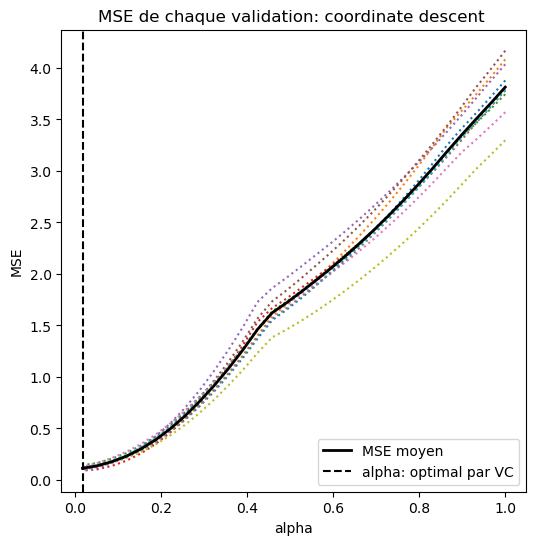

In [163]:
plt.figure(figsize = ((6,6)))
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=10, alphas=np.linspace(0.017,1,30),n_jobs=-1,random_state=13).fit(X_train,Y_train)
m_alphas =model.alphas_
plt.plot(m_alphas, model.mse_path_, ':')
plt.plot(m_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(model.alpha_, linestyle='--', color='k',
            label='alpha: optimal par VC')
#print(model.alpha_)
plt.legend()

plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

Le minimum pour chaque validation croisée est bien en $\alpha =0.017$

In [164]:
prev=regLassOpt.predict(X_train)
print("R2=",r2_score(Y_train,prev))

R2= 0.9807062829149203


On obtient un score $R²$ de 0.98 sur notre échantillon d'apprentissage. Notre modèle ajuste bien nos données. On remarque que ce score est plus petit que celui obtenu sans pénalisation. Ce qui est normal puisque le critère $R²$ conduit à un surajustement.

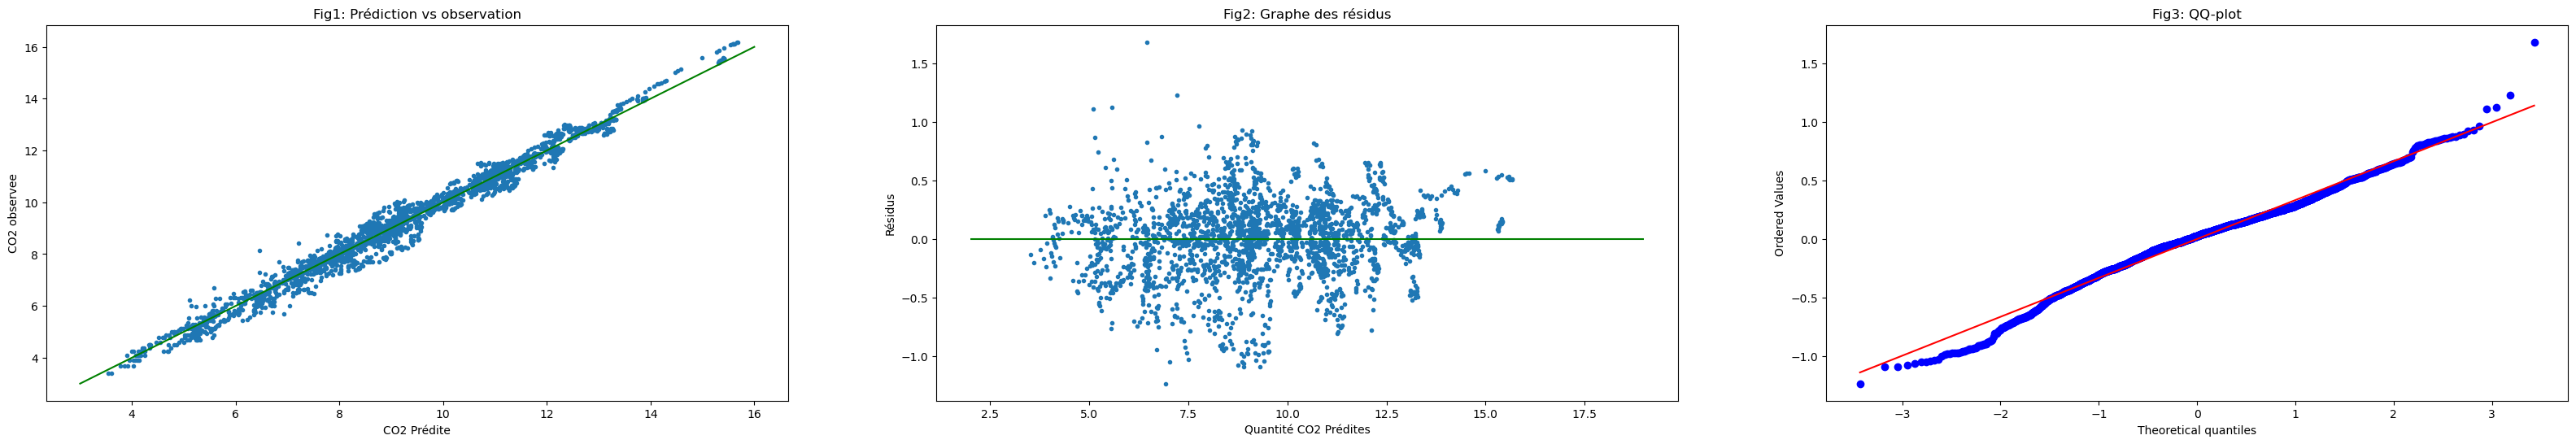

In [166]:
plt.figure(figsize = (40,6))
plt.subplot(1,3,1)
plt.plot(prev,Y_train,".")
bis=range(3,17)
plt.plot(bis,bis,color='green')
plt.xlabel(u"CO2 Prédite")
plt.ylabel("CO2 observee")
plt.title('Fig1: Prédiction vs observation')
plt.subplot(1,3,2)
plt.plot(prev,Y_train-prev,".")
plt.xlabel(u"Quantité CO2 Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,2,19,color='green')
plt.title('Fig2: Graphe des résidus')

plt.subplot(1,3,3)  
stats.probplot(Y_train-prev, dist="norm", plot=pylab)
plt.title('Fig3: QQ-plot')
pylab.show()
plt.show()
#print(np.mean(Y_train-prev))

- Sur la figure 1, les points sont toujours le long de la première bissectrice. Ce qui confirme le bon score R² obtenu. 
- Sur le graphe des résidus, on remrque qu'ils sont plus grands que dans le modèle linaire sans pénalisation
-  L'hypothèse de normalité des résidus n'est toujours pas respectées

#### Interpretation de l'effet des variables

In [167]:
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(X_train,Y_train)


In [168]:
coef = pd.Series(model_lasso.coef_, index = X1_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 13 variables et en supprime 22


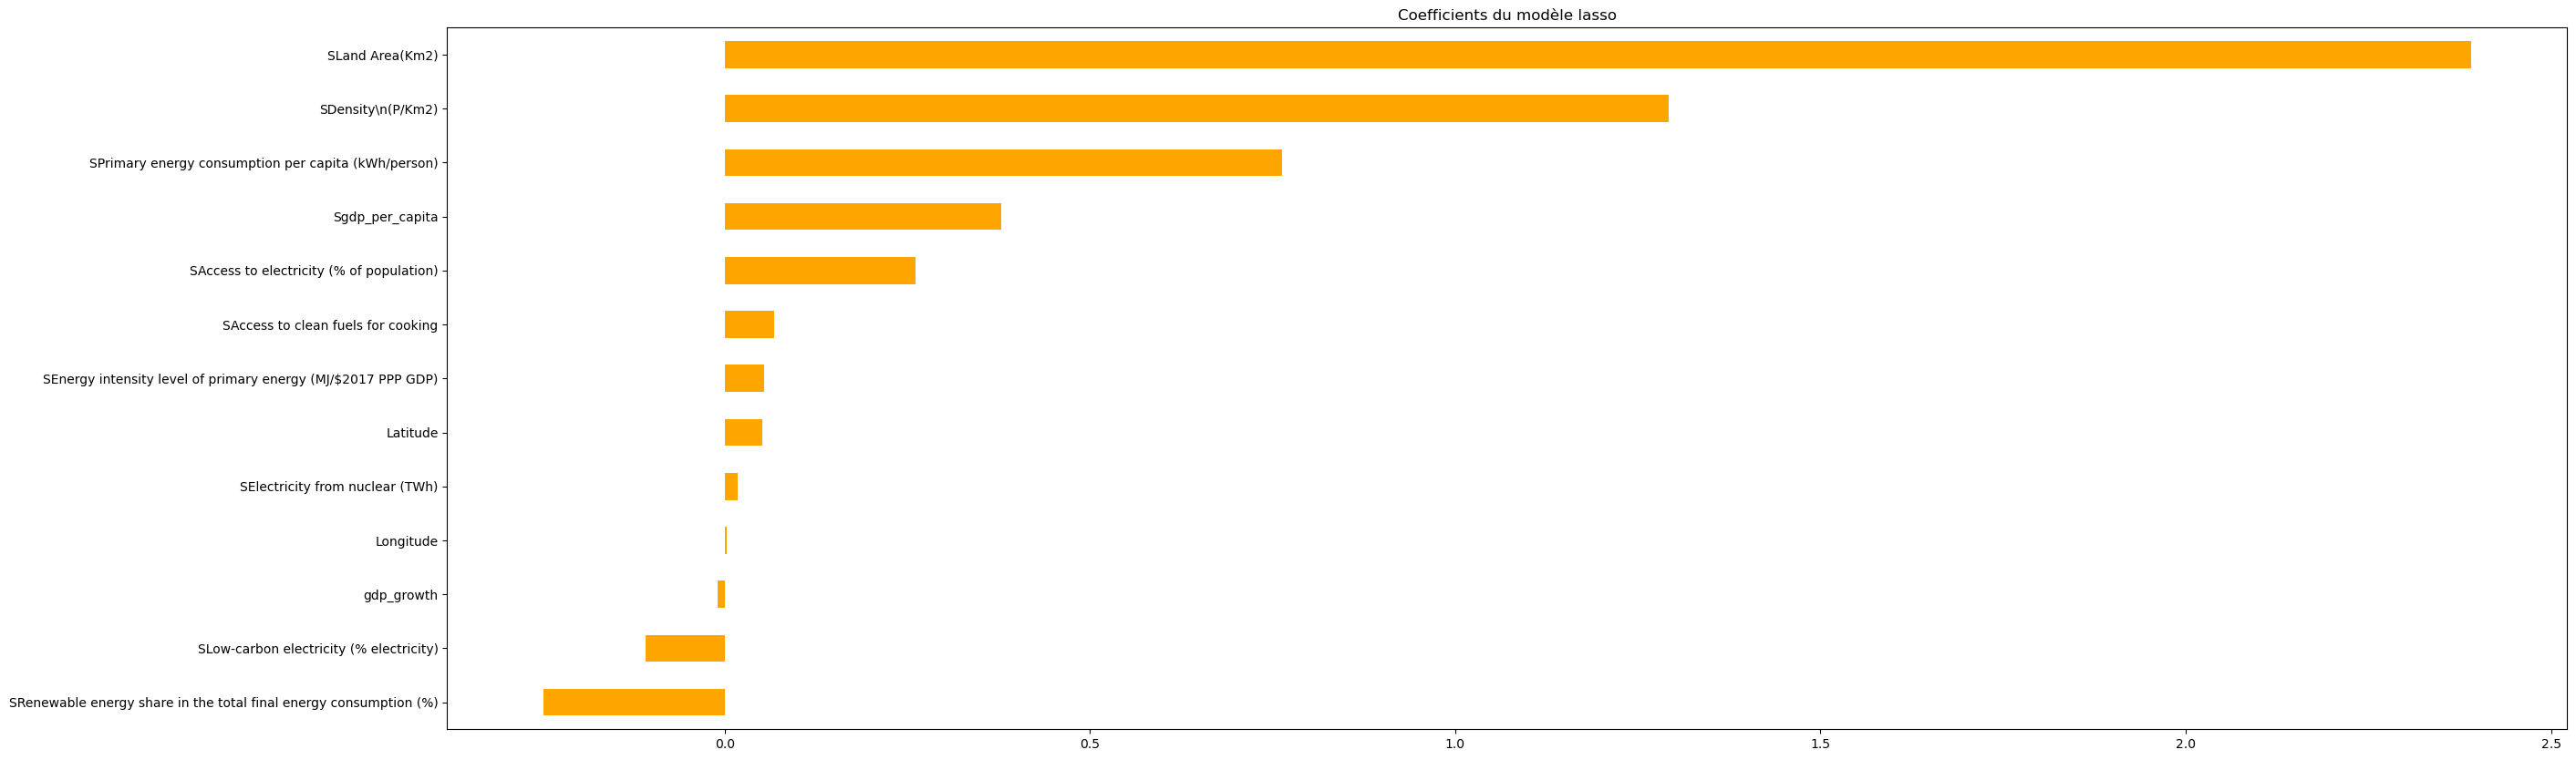

In [169]:
plt.figure(figsize = (30,10))
imp_coef = coef.loc[coef!=0]
imp_coef = imp_coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh",color='orange')
plt.title(u"Coefficients du modèle lasso")
plt.show()

La sélection de variables faites par le modèle Lasso confirme notre analyse descriptive du jeu de données. La superfice, la densité de la population , la richesse, la position sur le globe (latitude) et l'accès à l'électricité sont les principaux vecteurs de pollution d'un pays. À L'opposée, le taux d'énergie renouvelable dans la consommation d'énergie totale  et l'utilisation d'une électricité plus verte contribuent à diminuer la quantité de CO2 émise par un pays

### SVR

On fait une validation croisée pour justifier le type de noyau que l'on va prendre. 

In [172]:
from sklearn.svm import SVR
#param=[{"C":[0.4,0.5,0.6,0.8,1,1.4,2]},{"kernel":('rbf')}]
param = {'kernel':('linear','poly', 'rbf', 'sigmoid'), 'C':[0.4,0.5,0.6,0.8,1,1.4,2], 'gamma':[0.02,0.028,0.1,0.5,0.9,1]}
svm= GridSearchCV(SVR(),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))

Meilleur score = 0.013919, Meilleur paramètre = {'C': 2, 'gamma': 0.02, 'kernel': 'rbf'}


In [77]:
# Prévision de l'échantillon train
prev = svmOpt.predict(X_train)
print("MSE=",mean_squared_error(prev,Y_train))
print("R2=",r2_score(Y_train,prev))

MSE= 0.019769065036938763
R2= 0.9965785937123965


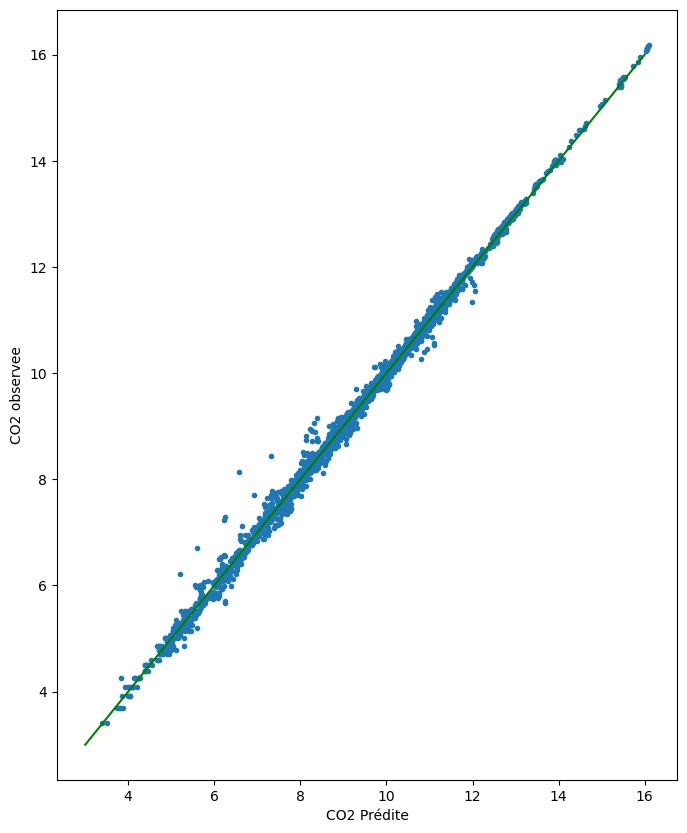

In [78]:
plt.plot(prev,Y_train,".")
bis=range(3,17)
plt.plot(bis,bis,color='green')
plt.xlabel(u"CO2 Prédite")

plt.ylabel("CO2 observee")
plt.show()


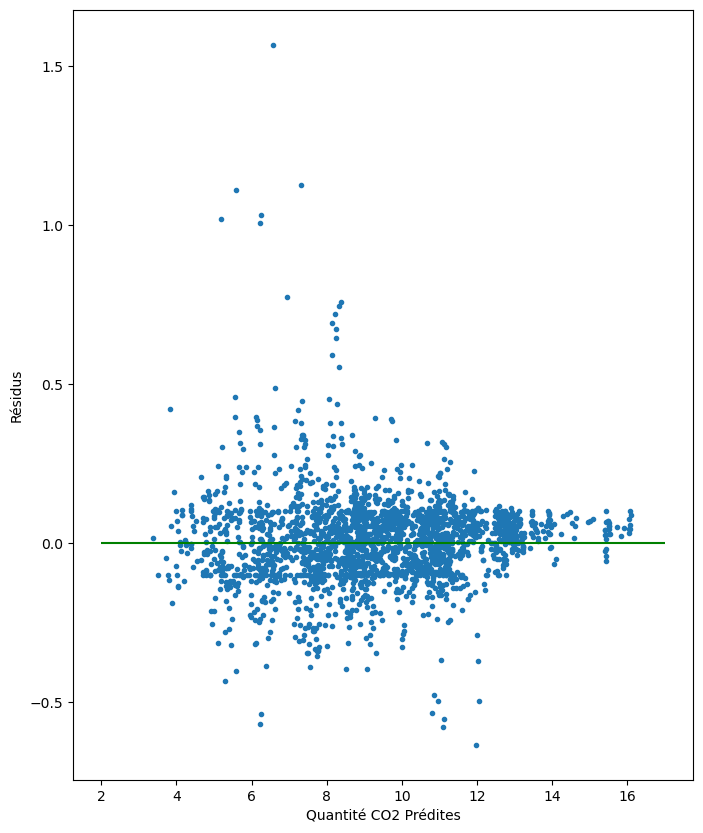

In [79]:
plt.plot(prev,Y_train-prev,".")
plt.xlabel(u"Quantité CO2 Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,2,17,color='green')
plt.show()

### Comparaison des résultats sur l'échantillon de test

### CART 

In [80]:
from sklearn.tree import DecisionTreeRegressor
print(Y_train.dtype)

float64


In [81]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.022751, Meilleur paramètre = {'max_depth': 9}


In [82]:
# Estimation de l'erreur de prévision
1-treeOpt.score(X_test,Y_test)

0.016914779939375957

In [83]:
# prévision de l'échantillon test
y_chap = treeOpt.predict(X_test)
print(len(y_chap))
print(len(Y_test))
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)


573
573
SValue_co2_emissions_kt_by_country  3.688879   4.094345   4.499810   \
row_0                                                                 
4.041102                                    1          4          0   
4.998033                                    0          0          1   
5.364902                                    0          0          0   
5.438079                                    0          0          0   
5.456188                                    0          0          0   
...                                       ...        ...        ...   
15.425859                                   0          0          0   
15.577606                                   0          0          0   
15.824370                                   0          0          0   
15.952622                                   0          0          0   
16.113448                                   0          0          0   

SValue_co2_emissions_kt_by_country  4.499810   4.605170   4.700480  

In [84]:
from sklearn.metrics import r2_score
print("R2=", r2_score(Y_test, y_chap))

R2= 0.983085220060624


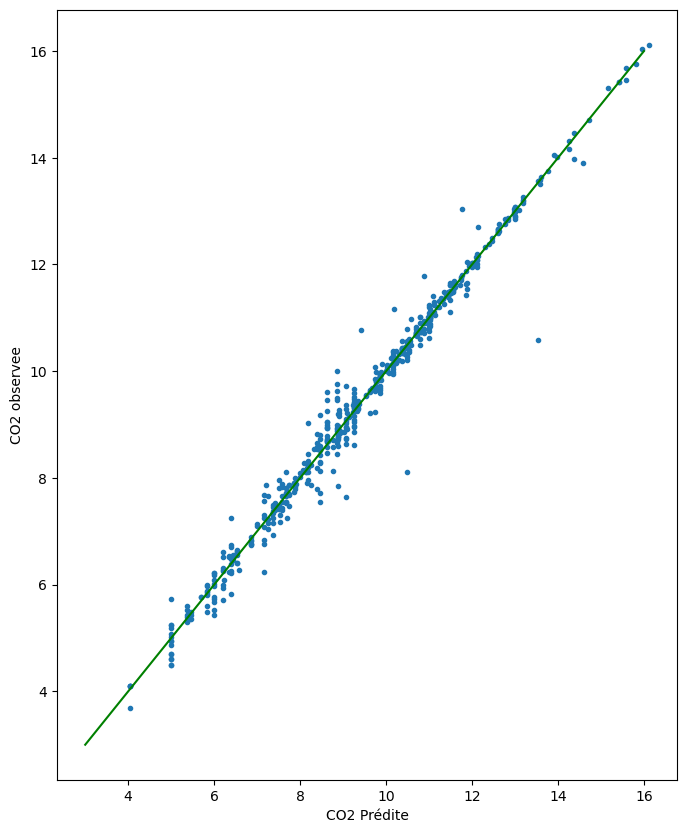

In [86]:
plt.plot(y_chap,Y_test,".")
bis=range(3,17)
plt.plot(bis,bis,color='green')
plt.xlabel(u"CO2 Prédite")

plt.ylabel("CO2 observee")
plt.show()


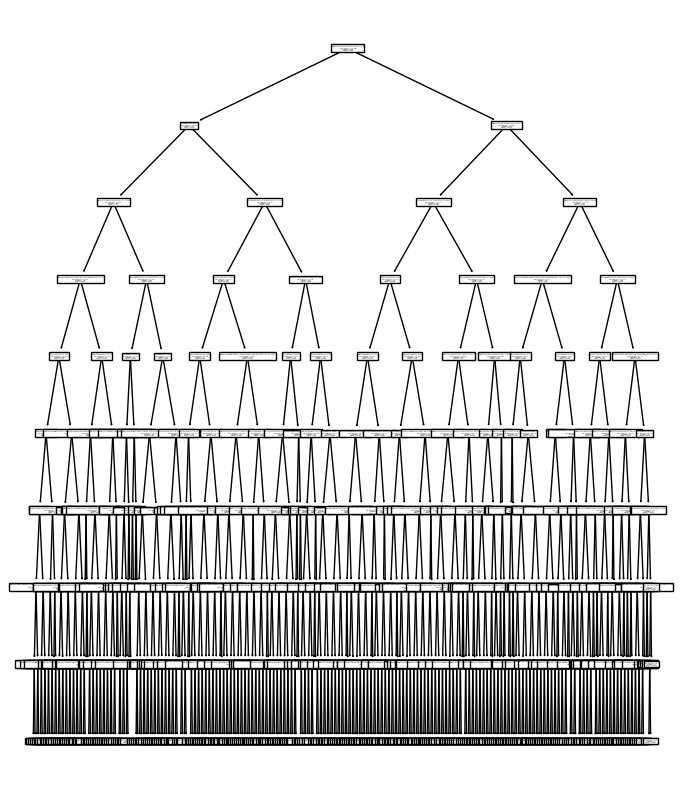

In [87]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
treeG=DecisionTreeRegressor(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(X_train,Y_train)
plot_tree(treeG,feature_names=dfC.columns.tolist());
plt.show()

calculez la prévision de l'échantillon test, tracez les résidus, calculez le MSE sur l'échantillon test.

In [88]:
# Estimation de l'erreur de prévision
1-treeG.score(X_test,Y_test)

0.016700903799021227

In [89]:
# prévision de l'échantillon test
y_chap = treeG.predict(X_test)
print(len(y_chap))
print(len(Y_test))
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

573
573
SValue_co2_emissions_kt_by_country  3.688879   4.094345   4.499810   \
row_0                                                                 
4.041102                                    1          4          0   
4.998033                                    0          0          1   
5.364902                                    0          0          0   
5.456188                                    0          0          0   
5.560682                                    0          0          0   
...                                       ...        ...        ...   
15.425859                                   0          0          0   
15.577606                                   0          0          0   
15.824370                                   0          0          0   
16.071200                                   0          0          0   
16.113448                                   0          0          0   

SValue_co2_emissions_kt_by_country  4.499810   4.605170   4.700480  

In [90]:
from sklearn.metrics import r2_score
print("R2=", r2_score(Y_test, y_chap))

R2= 0.9832990962009788


In [91]:
print("MSE=",mean_squared_error(y_chap,Y_test))

MSE= 0.08864164520520122


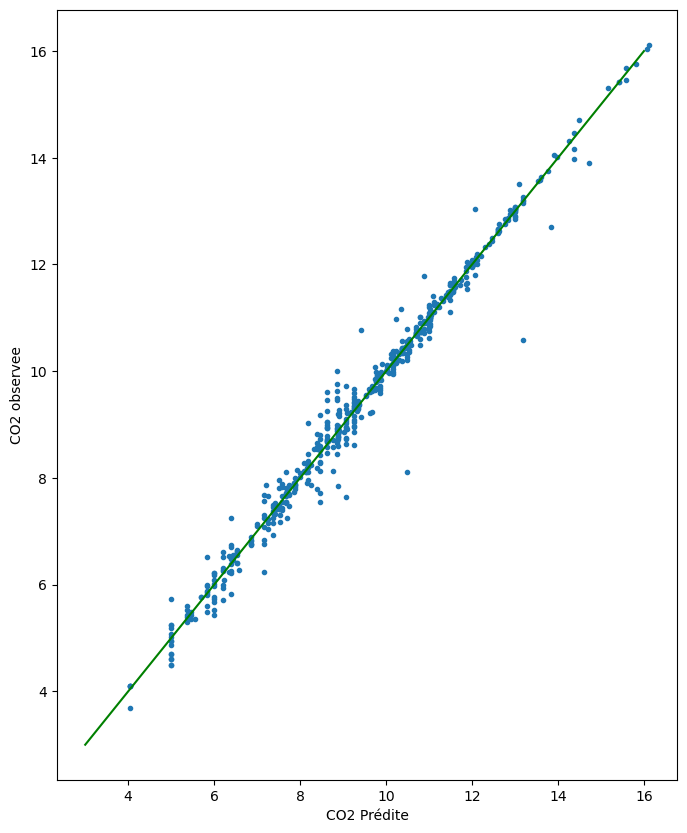

In [92]:
plt.plot(y_chap,Y_test,".")
bis=range(3,17)
plt.plot(bis,bis,color='green')
plt.xlabel(u"CO2 Prédite")

plt.ylabel("CO2 observee")
plt.show()

### Random Forests

In [93]:
# MDA, MDI, m=p/3

In [94]:
from sklearn.ensemble import RandomForestRegressor

# définition des paramètres
forest = RandomForestRegressor(n_estimators=500, 
                                max_depth=None,
                                min_samples_split=2, 
                                min_samples_leaf=1, 
                                max_features='auto', 
                                max_leaf_nodes=None,
                                bootstrap=True, 
                                oob_score=True)

# apprentissage
rfFit = forest.fit(X_train, Y_train)
print(1 - rfFit.oob_score_)


/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.00353044682999748


Une erreur d'abstention faible indique généralement une bonne indication de la performance du modèle.
On a une bonne erreur d'abstention : elle est proche de zéro.

On va comparer l'erreur out-of-bag ci-dessus avec celle sur l'échantillon test.

In [95]:
# erreur de prévision sur le test
1-rfFit.score(X_test,Y_test)

0.005232490491700825

In [96]:
# prévision de l'échantillon test
y_chap = rfFit.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

SValue_co2_emissions_kt_by_country  3.688879   4.094345   4.499810   \
row_0                                                                 
3.799302                                    1          0          0   
4.094069                                    0          1          0   
4.117484                                    0          1          0   
4.185260                                    0          1          0   
4.377391                                    0          1          0   
...                                       ...        ...        ...   
15.443475                                   0          0          0   
15.567477                                   0          0          0   
15.607089                                   0          0          0   
15.911498                                   0          0          0   
16.107225                                   0          0          0   

SValue_co2_emissions_kt_by_country  4.499810   4.605170   4.700480   \
row_0

In [97]:
from sklearn.metrics import r2_score
print("R2=", r2_score(Y_test, y_chap))

R2= 0.9947675095082992


In [98]:
print("MSE=",mean_squared_error(y_chap,Y_test))

MSE= 0.027771944038867666


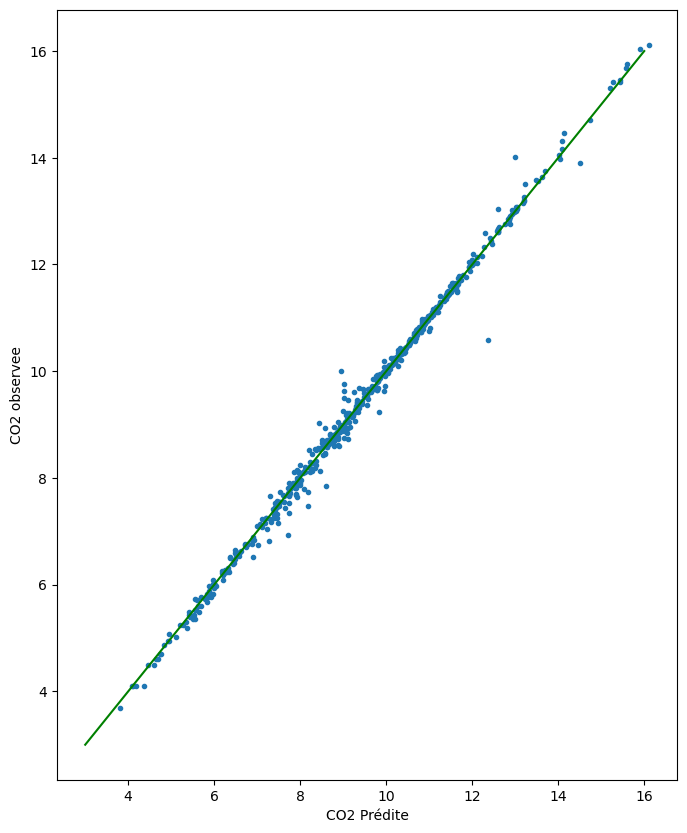

In [99]:
plt.plot(y_chap,Y_test,".")
bis=range(3,17)
plt.plot(bis,bis,color='green')
plt.xlabel(u"CO2 Prédite")

plt.ylabel("CO2 observee")
plt.show()

On va optimiser par validation croisée du nombre de variables tirées aléatoirement lors de la construction de chaque noeud.

In [100]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.013780, Meilleur paramètre = {'max_features': 9}


In [101]:
# erreur de prévision sur le test
1-rfOpt.score(X_test,Y_test)

0.011328507299609769

In [102]:
# prévision
y_chap = rfFit.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

SValue_co2_emissions_kt_by_country  3.688879   4.094345   4.499810   \
row_0                                                                 
3.799302                                    1          0          0   
4.094069                                    0          1          0   
4.117484                                    0          1          0   
4.185260                                    0          1          0   
4.377391                                    0          1          0   
...                                       ...        ...        ...   
15.443475                                   0          0          0   
15.567477                                   0          0          0   
15.607089                                   0          0          0   
15.911498                                   0          0          0   
16.107225                                   0          0          0   

SValue_co2_emissions_kt_by_country  4.499810   4.605170   4.700480   \
row_0

In [103]:
# calcul d'un indicateur d'importance des variables

In [104]:
rf= RandomForestRegressor(n_estimators=100,max_features=2)
rfFit=rf.fit(X_train, Y_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(15):
    print(dfC.columns[indices[f]], importances[indices[f]])

SElectricity from renewables (TWh) 0.09810376888082588
SLand Area(Km2) 0.09241333501671248
Latitude 0.07252368115281893
SElectricity from nuclear (TWh) 0.0643927824886705
SAccess to clean fuels for cooking 0.05992119913535935
SPrimary energy consumption per capita (kWh/person) 0.055254633613952456
SRenewable energy share in the total final energy consumption (%) 0.05429853839718703
Sgdp_per_capita 0.05026087788131668
SAccess to electricity (% of population) 0.049649376736388605
SLow-carbon electricity (% electricity) 0.043031952593543636
Longitude 0.04116959654496289
SDensity\n(P/Km2) 0.029904663691887913
SEnergy intensity level of primary energy (MJ/$2017 PPP GDP) 0.024055459884428497
gdp_growth 0.018316051016147774
Entity_United States 0.010982642271329899


On remarque que les variables les plus importantes sont la part d'éléctricité renouvelable consommée, la superficie du pays et la consommation d'énergie par personne.

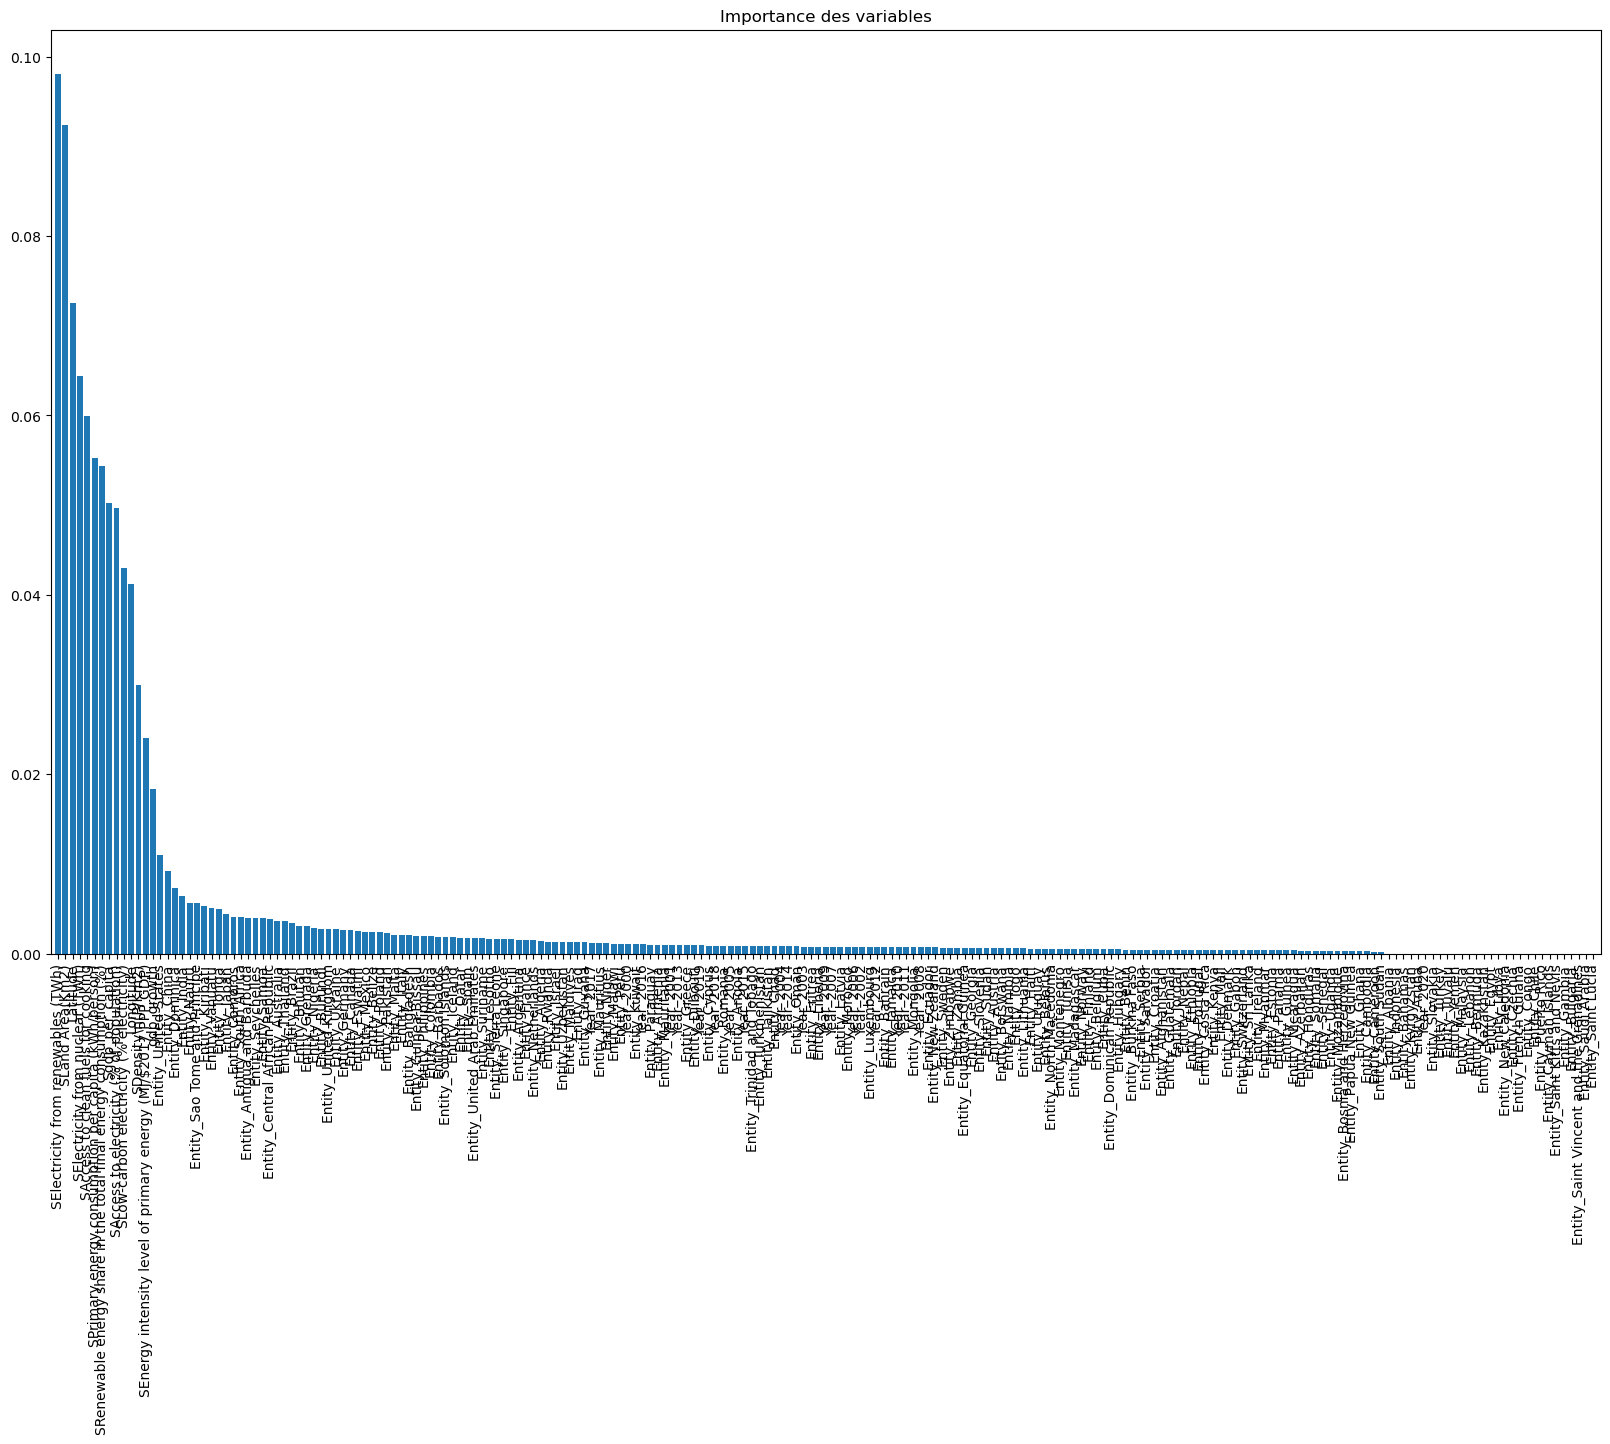

In [105]:
# Graphe des importances avec les noms des variables en abscisses
plt.figure(figsize=(20, 12))
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), dfC.columns[indices], rotation=90)  # Utilisation des noms de colonnes
plt.xlim([-1, X_train.shape[1]])
plt.show()


## Retour sur l'analyse exploratoire

## Imputation des données manquantes

Dans un premier temps, nous avons supprimer les individus comportant des valeurs manquantes. Ceci induit une perte d'informations. Il est possible de se servir de toute l'information disponible grâce à une procédure d'imputation des valeurs manquantes. 

Nous allons recommencer avec le jeu de données initial contenant des données manquantes et formater les variables.

In [106]:
energyna ="global-data-on-sustainable-energy (1).csv"
energyna=pd.read_csv(energyna, sep=",")
energyna['Density\\n(P/Km2)']=energyna['Density\\n(P/Km2)'].apply(clean_density)
energyna["Entity"]=pd.Categorical(energyna["Entity"],ordered=False)
energyna["Year"]=pd.Categorical(energyna["Year"],ordered=True)
del energyna['Renewable-electricity-generating-capacity-per-capita']
del energyna['Financial flows to developing countries (US $)']
del energyna['Renewables (% equivalent primary energy)']
energyna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   Entity                                                            3649 non-null   category
 1   Year                                                              3649 non-null   category
 2   Access to electricity (% of population)                           3639 non-null   float64 
 3   Access to clean fuels for cooking                                 3480 non-null   float64 
 4   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64 
 5   Electricity from fossil fuels (TWh)                               3628 non-null   float64 
 6   Electricity from nuclear (TWh)                                    3523 non-null   float64 
 7   Electricity from renewab

In [107]:
#nrows = len(energyna)
missing_rates = 3649-energyna.count(axis=0)
missing_rates

Entity                                                                0
Year                                                                  0
Access to electricity (% of population)                              10
Access to clean fuels for cooking                                   169
Renewable energy share in the total final energy consumption (%)    194
Electricity from fossil fuels (TWh)                                  21
Electricity from nuclear (TWh)                                      126
Electricity from renewables (TWh)                                    21
Low-carbon electricity (% electricity)                               42
Primary energy consumption per capita (kWh/person)                    0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         207
Value_co2_emissions_kt_by_country                                   428
gdp_growth                                                          317
gdp_per_capita                                                  

Les variables Entity et Year ne contenant pas de donner manquantes, il s'agira ici de ne faire l'imputation que sur des variables quantitatives. 
Nous allons aussi enlever Electricity from fossil fuels

In [108]:
energynaQuant=energyna.drop(energyna.columns[0],axis=1)
energynaQuant=energynaQuant.drop(energynaQuant.columns[0],axis=1)  

In [109]:
energynaQuant=energynaQuant.drop(energynaQuant.columns[3],axis=1) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 15 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Access to electricity (% of population)                           3639 non-null   float64
 1   Access to clean fuels for cooking                                 3480 non-null   float64
 2   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 3   Electricity from nuclear (TWh)                                    3523 non-null   float64
 4   Electricity from renewables (TWh)                                 3628 non-null   float64
 5   Low-carbon electricity (% electricity)                            3607 non-null   float64
 6   Primary energy consumption per capita (kWh/person)                3649 non-null   float64
 7   Energy intensity level of primary

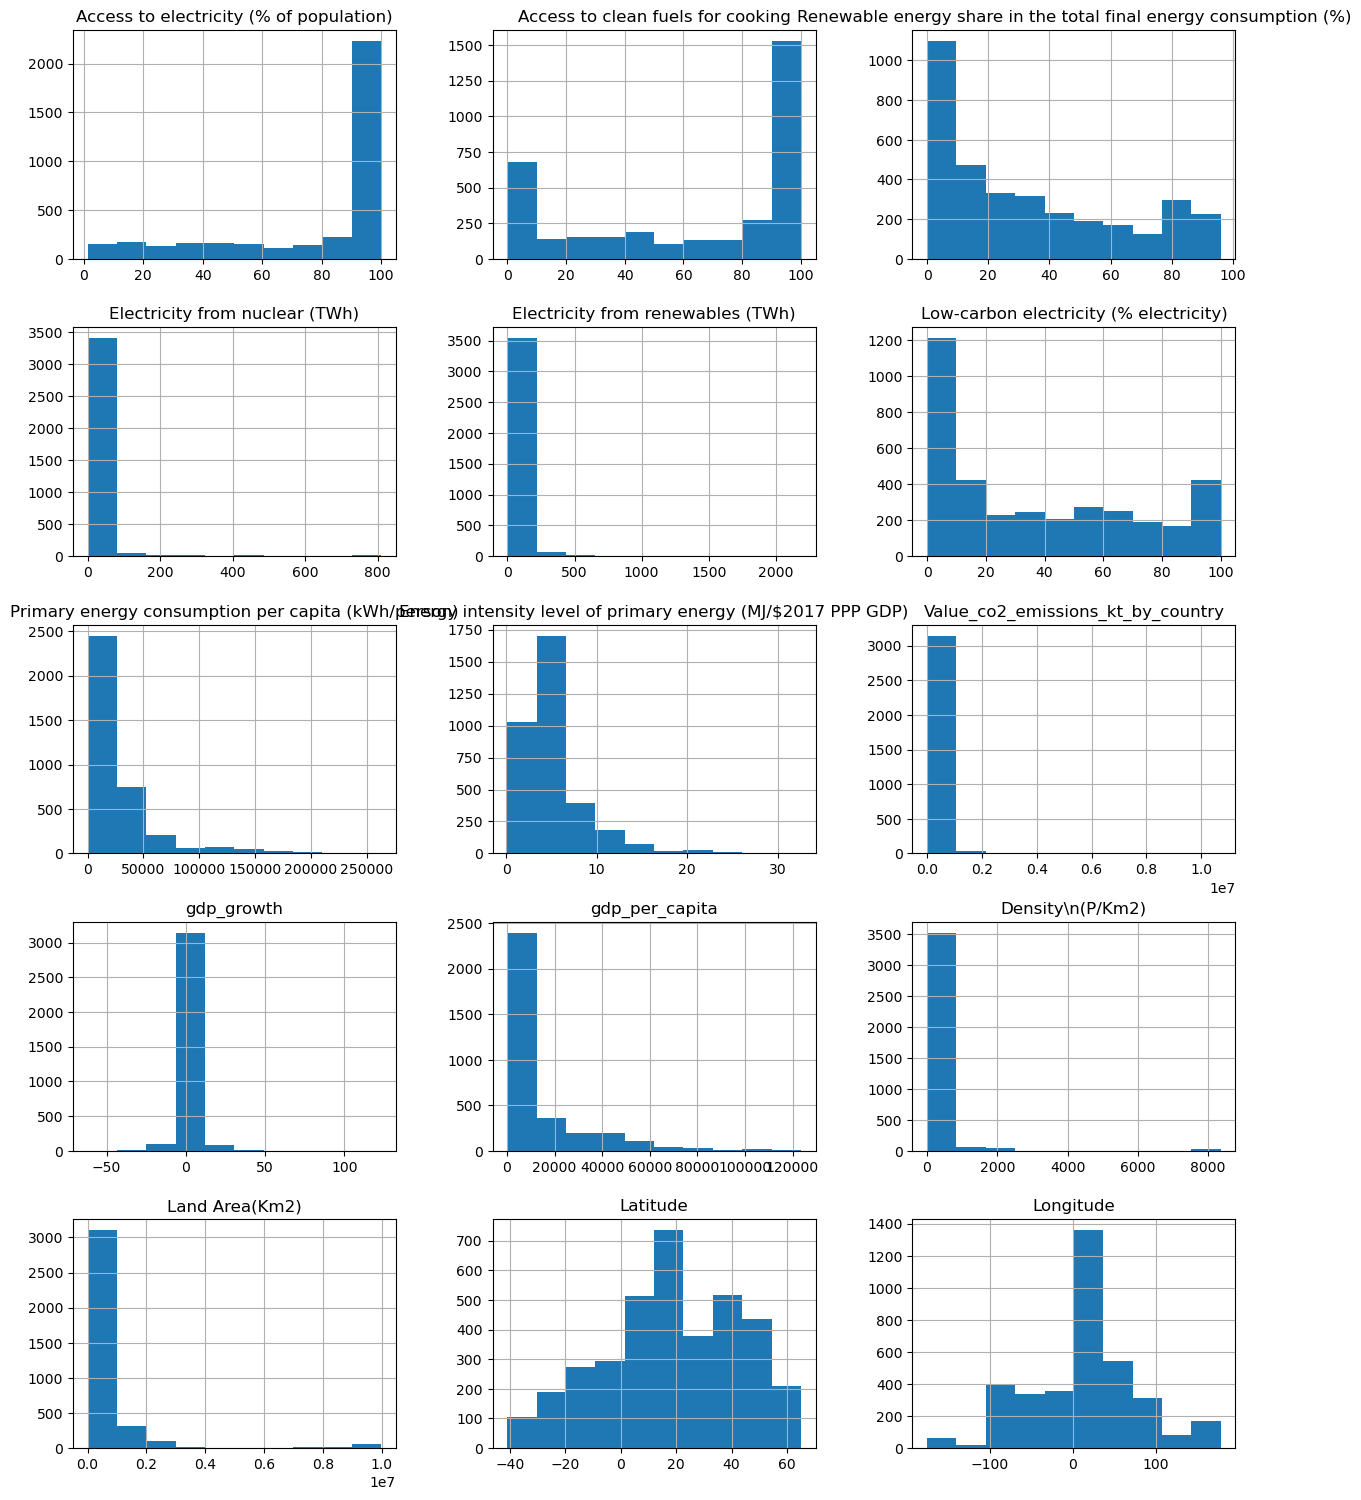

In [110]:
energynaQuant.info()
energynaQuant.hist(figsize = (15,30),layout=(8,3))
plt.show()

Certains algorithmes d'imputation comme Amélia II font l'hypothèse que les variables sont gaussiennes. Nous allons donc faire des transformations de variables dans l'espoir d'obtenir des variables plus symétriques.

In [111]:

energynaQuant["SAccess to electricity (% of population)"]=energynaQuant["Access to electricity (% of population)"].map(lambda x: log(x))
energynaQuant["SAccess to clean fuels for cooking"]=energynaQuant["Access to clean fuels for cooking"].map(lambda x: log(1+x))
energynaQuant["SRenewable energy share in the total final energy consumption (%)"]=energynaQuant["Renewable energy share in the total final energy consumption (%)"].map(lambda x: sqrt(x))
energynaQuant["SElectricity from nuclear (TWh)"]=energynaQuant["Electricity from nuclear (TWh)"].map(lambda x: log(1+x))
energynaQuant["SElectricity from renewables (TWh)"]=energynaQuant["Electricity from renewables (TWh)"].map(lambda x: log(1+x))
energynaQuant["SLow-carbon electricity (% electricity)"]=energynaQuant["Low-carbon electricity (% electricity)"].map(lambda x: sqrt(x))
energynaQuant["SPrimary energy consumption per capita (kWh/person)"]=energynaQuant["Primary energy consumption per capita (kWh/person)"].map(lambda x: log(1+x))
energynaQuant["SEnergy intensity level of primary energy (MJ/$2017 PPP GDP)"]=energynaQuant["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"].map(lambda x: log(sqrt(x)))
energynaQuant["Sgdp_per_capita"]=energynaQuant["gdp_per_capita"].map(lambda x:log(sqrt(x)))
energynaQuant["SDensity\\n(P/Km2)"]=energynaQuant["Density\\n(P/Km2)"].map(lambda x:log(x))
energynaQuant["SLand Area(Km2)"]=energynaQuant["Land Area(Km2)"].map(lambda x:log(x))
energynaQuant["SValue_co2_emissions_kt_by_country"]=energynaQuant["Value_co2_emissions_kt_by_country"].map(lambda x:log(x))


In [112]:
del energynaQuant['Renewable energy share in the total final energy consumption (%)']
del energynaQuant['Electricity from nuclear (TWh)']
del energynaQuant['Electricity from renewables (TWh)']
del energynaQuant['Low-carbon electricity (% electricity)']
del energynaQuant['Primary energy consumption per capita (kWh/person)']
del energynaQuant['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']
del energynaQuant['gdp_per_capita']
del energynaQuant['Density\\n(P/Km2)']
del energynaQuant['Land Area(Km2)']
del energynaQuant['Value_co2_emissions_kt_by_country']
del energynaQuant['Access to clean fuels for cooking']
del energynaQuant['Access to electricity (% of population)']


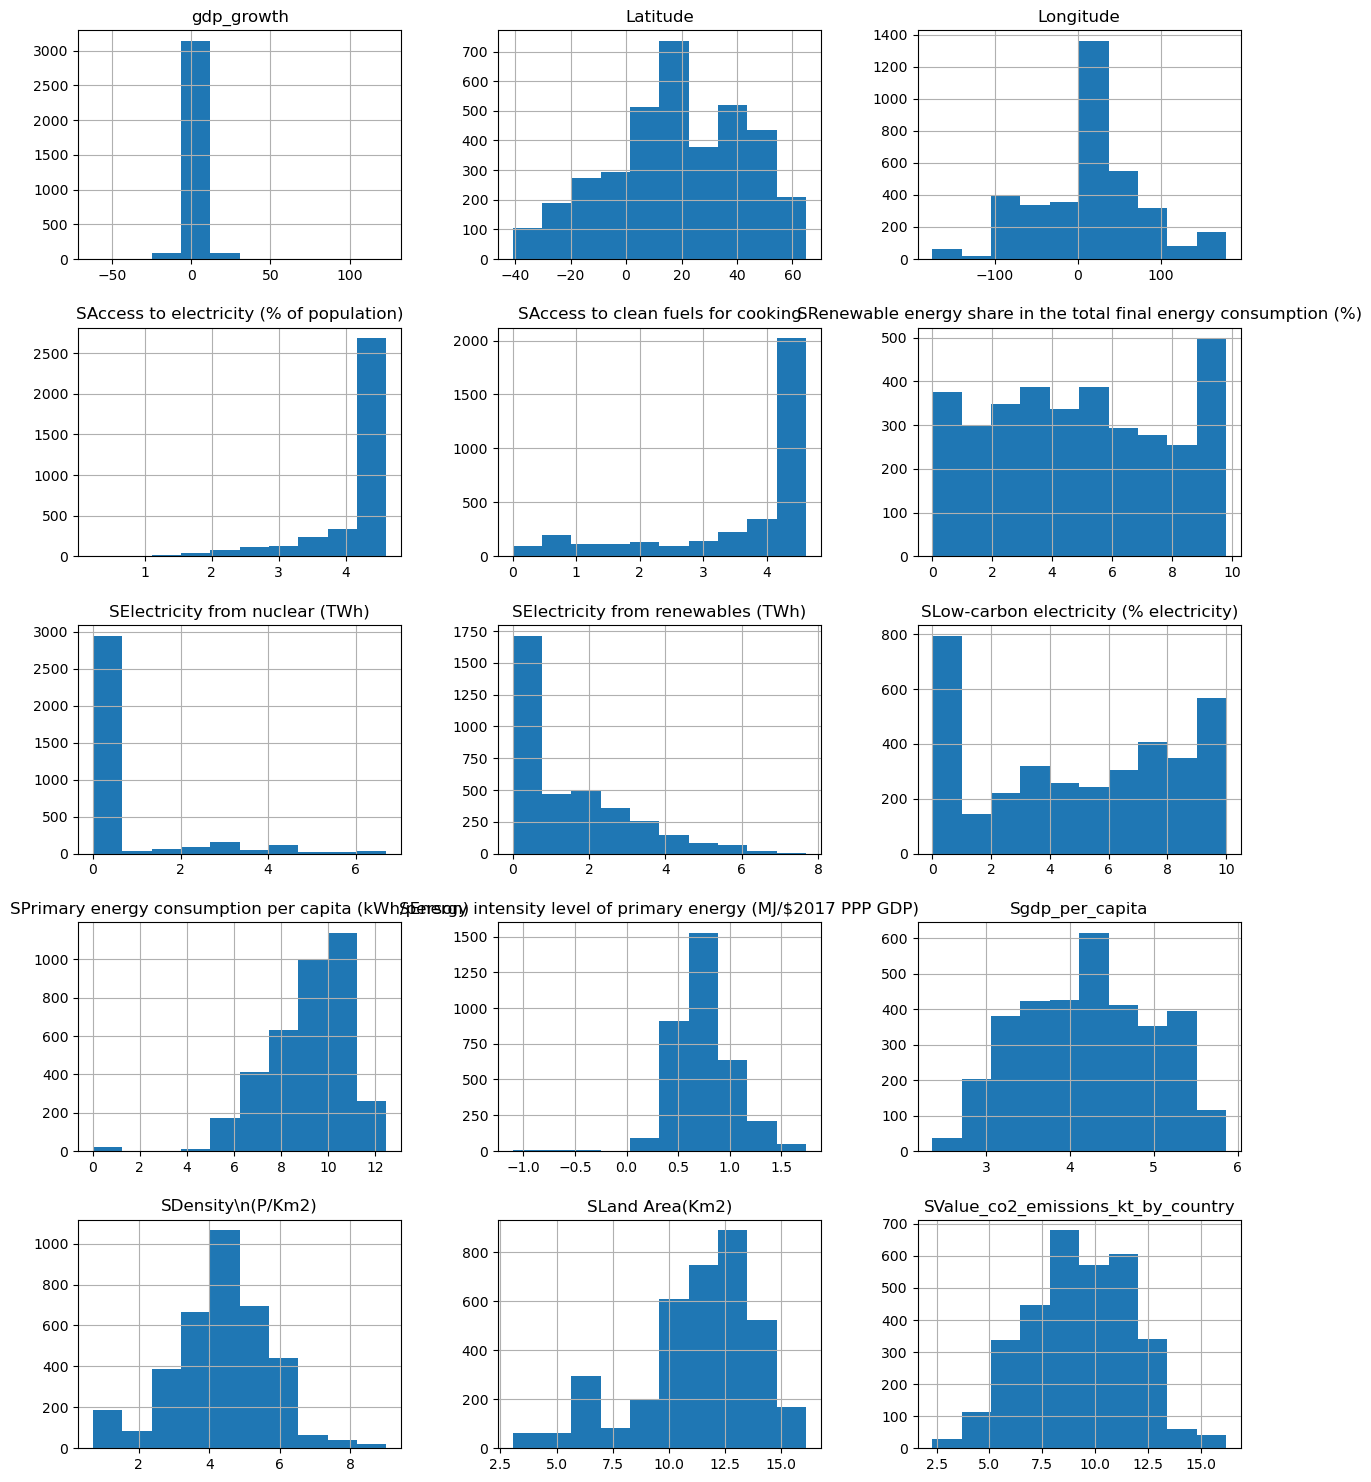

In [113]:
energynaQuant.hist(figsize = (15,30),layout=(8,3))
plt.show()

MisForest et Amélia II sont les algorithmes d'imputation de valeurs manquantes les plus stables. Cependant, Amélia II  fait l'hypothèse que les données sont Missing At Random (MAR). Ce qui n'est pas garanti ici parce que les Etats pourraient être tentés de cacher les informations relativs aux années où ils ont émis le plus de CO2. En outre, les transformations que nous avons faites n'ont pas permis de rendre les variables comme Access to Electricity plus "gaussiennes".D'autre part, nous avons remarquer une forte corrélation entre des groupes de variables. La prédiction faite par MisForest sera donc efficace. Pour toutes ces raisons, nous faisons le choix d'utiliser MisForest pour la complétion de nos données.

### Imputation mediane au cas ou 

Nous allons faire une imputation simple en remplaçant les valeurs manquantes par la médiane des variables. En effet, la médiane  est préférable à la moyenne empirique car c'est un estimateur biaisé.

In [114]:
from sklearn.impute import SimpleImputer
X_med = SimpleImputer(strategy='median').fit_transform(energynaQuant)
X_medImp=pd.DataFrame(X_med, columns=energynaQuant.columns)

In [115]:
missing_rates = 3649-X_medImp.count(axis=0)
missing_rates

gdp_growth                                                           0
Latitude                                                             0
Longitude                                                            0
SAccess to electricity (% of population)                             0
SAccess to clean fuels for cooking                                   0
SRenewable energy share in the total final energy consumption (%)    0
SElectricity from nuclear (TWh)                                      0
SElectricity from renewables (TWh)                                   0
SLow-carbon electricity (% electricity)                              0
SPrimary energy consumption per capita (kWh/person)                  0
SEnergy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Sgdp_per_capita                                                      0
SDensity\n(P/Km2)                                                    0
SLand Area(Km2)                                                      0
SValue

### Imputation KNN au cas ou 

In [116]:
from sklearn.impute import  KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
X_kNN = knn_imputer.fit_transform(energynaQuant)
X_kNNImp=pd.DataFrame(X_kNN, columns=energynaQuant.columns)

In [117]:
missing_rates = 3649-X_kNNImp.count(axis=0)
missing_rates

gdp_growth                                                           0
Latitude                                                             0
Longitude                                                            0
SAccess to electricity (% of population)                             0
SAccess to clean fuels for cooking                                   0
SRenewable energy share in the total final energy consumption (%)    0
SElectricity from nuclear (TWh)                                      0
SElectricity from renewables (TWh)                                   0
SLow-carbon electricity (% electricity)                              0
SPrimary energy consumption per capita (kWh/person)                  0
SEnergy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Sgdp_per_capita                                                      0
SDensity\n(P/Km2)                                                    0
SLand Area(Km2)                                                      0
SValue

In [118]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

estimator_rf = ExtraTreesRegressor(n_estimators=30, random_state=0)


In [119]:
energyQuant_rf = IterativeImputer(estimator=estimator_rf, tol=4e-2,random_state=0,max_iter=100).fit_transform(energynaQuant)

In [120]:
X_rfImp=pd.DataFrame(energyQuant_rf, columns=energynaQuant.columns)


In [121]:
#nrows = len(energyna)
missing_rates = 3649-X_rfImp.count(axis=0)
missing_rates

gdp_growth                                                           0
Latitude                                                             0
Longitude                                                            0
SAccess to electricity (% of population)                             0
SAccess to clean fuels for cooking                                   0
SRenewable energy share in the total final energy consumption (%)    0
SElectricity from nuclear (TWh)                                      0
SElectricity from renewables (TWh)                                   0
SLow-carbon electricity (% electricity)                              0
SPrimary energy consumption per capita (kWh/person)                  0
SEnergy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Sgdp_per_capita                                                      0
SDensity\n(P/Km2)                                                    0
SLand Area(Km2)                                                      0
SValue

### Modélisation avec le jeu de données complété

In [122]:
Y=X_rfImp["SValue_co2_emissions_kt_by_country"]

In [123]:
del X_rfImp["SValue_co2_emissions_kt_by_country"]


In [124]:
energynaDum=pd.get_dummies(energyna[["Entity","Year"]])
dfCImp=pd.concat([energynaDum,X_rfImp],axis=1)
dfCImp.head()

,Entity_Afghanistan,Entity_Albania,Entity_Algeria,Entity_Angola,Entity_Antigua and Barbuda,Entity_Argentina,Entity_Armenia,Entity_Aruba,Entity_Australia,Entity_Austria,...,SAccess to clean fuels for cooking,SRenewable energy share in the total final energy consumption (%),SElectricity from nuclear (TWh),SElectricity from renewables (TWh),SLow-carbon electricity (% electricity),SPrimary energy consumption per capita (kWh/person),SEnergy intensity level of primary energy (MJ/$2017 PPP GDP),Sgdp_per_capita,SDensity\n(P/Km2),SLand Area(Km2)
0,1,0,0,0,0,0,0,0,0,0,...,1.974081,6.707459,0.0,0.270027,8.121419,5.715694,0.247348,2.838738,4.094345,13.388153
1,1,0,0,0,0,0,0,0,0,0,...,2.104134,6.752777,0.0,0.405465,9.205746,5.471816,0.276943,2.696206,4.094345,13.388153
2,1,0,0,0,0,0,0,0,0,0,...,2.219203,6.150610,0.0,0.444686,9.008853,5.355936,0.168236,2.594883,4.094345,13.388153
3,1,0,0,0,0,0,0,0,0,0,...,2.351375,6.054750,0.0,0.488580,8.186653,5.442280,0.168236,2.625308,4.094345,13.388153
4,1,0,0,0,0,0,0,0,0,0,...,2.476538,6.651316,0.0,0.444686,7.932298,5.324137,0.091161,2.676834,4.094345,13.388153


In [125]:

from sklearn.model_selection import train_test_split 
t_size= int(0.2*energy.shape[0])
XnaImp_train,XnaImp_test,Y_train,Y_test=train_test_split(dfCImp,Y,test_size=t_size,random_state=11)

from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(XnaImp_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(XnaImp_test)



/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [126]:
print(Xr_train)

[[-2.94124444e-17  0.00000000e+00  3.09604678e-18 ...  3.69062809e+00
   6.13988455e+00  1.50055659e+01]
 [-2.94124444e-17  0.00000000e+00  3.09604678e-18 ...  3.62331241e+00
   6.14632926e+00  7.71199651e+00]
 [-2.94124444e-17  0.00000000e+00  3.09604678e-18 ...  3.05300370e+00
   3.68887945e+00  1.35915917e+01]
 ...
 [-2.94124444e-17  0.00000000e+00  3.09604678e-18 ...  3.30382941e+00
   3.21887582e+00  1.44368846e+01]
 [-2.94124444e-17  0.00000000e+00  3.09604678e-18 ...  4.88223344e+00
   3.43398720e+00  1.07194716e+01]
 [-2.94124444e-17  0.00000000e+00  3.09604678e-18 ...  4.78636928e+00
   3.76120012e+00  1.10867473e+01]]
